# Bibliotecas

In [624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate,validation_curve, learning_curve, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve, average_precision_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Dados

In [625]:
df_original = pd.read_csv("dataset/rh_data.csv")
# Mostrar todas as colunas
pd.set_option('display.max_columns', None)
df_original.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160              1.0000   
1         Research Scientist        Single          41890              0.0000   
2            Sales Executive       Married         193280              1.0000   
3            Human Resources       Married          83210              3.0000   
4            Sales Executive        Single          23420              4.0000   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0             1.0000                      6               1   
1             6.0000                      3               5   
2             5.0000                      2               5   
3            13.0000                      5               8   
4             9.0000                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

## C√≥pia do DataFrame Original

In [626]:
# C√≥pia do DataFrame original
df = df_original.copy()

# An√°lise Inicial

## Verificando a Quantidade de Linhas e Colunas

In [627]:
# Verificando a quantidade de linhas e colunas
df.shape

(4410, 24)

## Verificando os Tipos de Dados

In [628]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Duas colunas num√©ricas est√£o como float mas deveriam ser inteiras (NumCompaniesWorked, TotalWorkingYears).  
Isso pode indicar valores ausentes (NaNs). 
Colunas originalmente inteiras que aparecem como float geralmente indicam presen√ßa de NaN,  
porque o pandas precisa de um tipo que aceite valores nulos, e int tradicional n√£o aceita.

- A vari√°vel deveria ser int
- Est√° como float por causa dos NaN
- O tipo s√≥ pode ser convertido ap√≥s o tratamento dos valores ausentes

## Verificando Duplicados

In [629]:
# Quantidade de linhas duplicadas
df.duplicated().sum()

np.int64(0)

## Verificando Colunas com Valor √önico

In [630]:
# Verificando se h√° valores repetidos ao londo de colunas
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

Essa an√°lise foi feita para identificar colunas com valor constante, que n√£o agregam informa√ß√£o para o modelo.

EmployeeCount, Over18 e StandardHours t√™m apenas um valor √∫nico que se repete e, por isso, ser√£o removidas.

EmployeeID √© um identificador √∫nico, ent√£o tamb√©m n√£o deve ser usada como vari√°vel preditora.

### Excluindo Colunas com Valor √önico

In [631]:
colunas_valor_unico = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=colunas_valor_unico, inplace=True)

## Verificando Nulos

In [632]:
# Vari√°veis com valores nulos
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Inspecionando coluna com campos nulos em TotalWorkingYears

In [633]:
# Inspecionando as linhas onde 'TotalWorkingYears' √© nulo
df[df['TotalWorkingYears'].isnull()].head(9)

Age Attrition     BusinessTravel              Department  \
23     42        No      Travel_Rarely  Research & Development   
137    43        No  Travel_Frequently                   Sales   
308    47       Yes  Travel_Frequently  Research & Development   
574    37        No      Travel_Rarely  Research & Development   
1517   36        No         Non-Travel  Research & Development   
2367   39        No      Travel_Rarely                   Sales   
3120   35        No      Travel_Rarely  Research & Development   
3818   28       Yes      Travel_Rarely         Human Resources   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeID  Gender  \
23                   4          4  Life Sciences          24    Male   
137                 14          3  Life Sciences         138  Female   
308                  4          3  Life Sciences         309    Male   
574                 23          3  Life Sciences         575    Male   
1517                 5          4  Life Sciences        1518    Male   
2367                 2          4  Life Sciences        2368    Male   
3120                12          2        Medical        3121  Female   
3818                 1          3        Medical        3819  Female   
4409                28          3        Medical        4410    Male   

      JobLevel                 JobRole MaritalStatus  MonthlyIncome  \
23           1  Manufacturing Director       Married          89260   
137          1  Manufacturing Director       Married          37480   
308          1       Research Director        Single          27740   
574          3  Manufacturing Director      Divorced         166590   
1517         1         Sales Executive       Married          85780   
2367         1   Laboratory Technician      Divorced          72640   
3120         2    Sales Representative       Married          28090   
3818         2   Laboratory Technician       Married          24130   
4409         2   Laboratory Technician      Divorced          54680   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
23                1.0000                 14                 0   
137               7.0000                 14                 2   
308               4.0000                 13                 1   
574               7.0000                 16                 1   
1517              7.0000                 21                 0   
2367              0.0000                 17                 0   
3120              4.0000                 23                 1   
3818              1.0000                 16                 1   
4409              0.0000                 12                 0   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
23                  NaN                      4              20   
137                 NaN                      3               3   
308                 NaN                      2               5   
574                 NaN                      2               6   
1517                NaN                      4               9   
2367                NaN                      5              10   
3120                NaN                      2               8   
3818                NaN                      2               1   
4409                NaN                      6              21   

      YearsSinceLastPromotion  YearsWithCurrManager  
23                         11                     6  
137                         1                     2  
308                         1                     3  
574                         1                     3  
1517                        0                     8  
2367                        0                     7  
3120                        0                     0  
3818                        0                     0  
4409                        3                     9

### Analisando a rela√ß√£o entre TotalWorkingYears e NumCompaniesWorked

1. Se **NumCompaniesWorked** (n√∫mero de empresas em que trabalhou) √© igual a "0" a pessoa nunca trabalhou em outra empresa.
2. Por√©m, se **TotalWorkingYears** (anos totais de experi√™ncia profissional) √© **maior** do que **YearsAtCompany** (anos na empresa atual),  
indica diferentes interpreta√ß√µes sobre a contagem de anos de experi√™ncia.

In [634]:
# Verificando a l√≥gica na quantidade de anos de trabalho total se empresas trabalhadas √© zero
df[(df['NumCompaniesWorked'] == 0) & (df['TotalWorkingYears'] > df['YearsAtCompany'])].shape

(584, 21)

584 registros mostram que pode haver 'TotalWorkingYears' maior que 'YearsAtCompany' e ainda assim 'NumCompaniesWorked' ser 0.  
Ou seja, a pessoa pode ter trabalhado em outro lugar, mas pela regra de neg√≥cios n√£o conta como experi√™ncia em outra empresa.

Dessa forma, podemos inferir que quando 'NumCompaniesWorked' = 0, 'TotalWorkingYears' = 'YearsAtCompany'.

In [635]:
# Subistituindo os valores nulos de 'TotalWorkingYears' por 'YearsAtCompany' quando 'NumCompaniesWorked' √© 0
df.loc[(df['TotalWorkingYears'].isnull()) & (df['NumCompaniesWorked'] == 0), 'TotalWorkingYears'] = df['YearsAtCompany']

In [636]:
# Inspecionando as linhas onde 'TotalWorkingYears' √© nulo
df[df['TotalWorkingYears'].isnull()].head(9)

Age Attrition     BusinessTravel              Department  \
23     42        No      Travel_Rarely  Research & Development   
137    43        No  Travel_Frequently                   Sales   
308    47       Yes  Travel_Frequently  Research & Development   
574    37        No      Travel_Rarely  Research & Development   
1517   36        No         Non-Travel  Research & Development   
3120   35        No      Travel_Rarely  Research & Development   
3818   28       Yes      Travel_Rarely         Human Resources   

      DistanceFromHome  Education EducationField  EmployeeID  Gender  \
23                   4          4  Life Sciences          24    Male   
137                 14          3  Life Sciences         138  Female   
308                  4          3  Life Sciences         309    Male   
574                 23          3  Life Sciences         575    Male   
1517                 5          4  Life Sciences        1518    Male   
3120                12          2        Medical        3121  Female   
3818                 1          3        Medical        3819  Female   

      JobLevel                 JobRole MaritalStatus  MonthlyIncome  \
23           1  Manufacturing Director       Married          89260   
137          1  Manufacturing Director       Married          37480   
308          1       Research Director        Single          27740   
574          3  Manufacturing Director      Divorced         166590   
1517         1         Sales Executive       Married          85780   
3120         2    Sales Representative       Married          28090   
3818         2   Laboratory Technician       Married          24130   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
23                1.0000                 14                 0   
137               7.0000                 14                 2   
308               4.0000                 13                 1   
574               7.0000                 16                 1   
1517              7.0000                 21                 0   
3120              4.0000                 23                 1   
3818              1.0000                 16                 1   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
23                  NaN                      4              20   
137                 NaN                      3               3   
308                 NaN                      2               5   
574                 NaN                      2               6   
1517                NaN                      4               9   
3120                NaN                      2               8   
3818                NaN                      2               1   

      YearsSinceLastPromotion  YearsWithCurrManager  
23                         11                     6  
137                         1                     2  
308                         1                     3  
574                         1                     3  
1517                        0                     8  
3120                        0                     0  
3818                        0                     0

Ap√≥s esse tratamento, ficamos com 7 linhas ainda com 'TotalWorkingYears' nulo.  
Deixar assim por enquanto e seguir para a pr√≥xima vari√°vel com dados nulos.

### Inspecionando coluna com campos nulos em NumCompaniesWorked

In [637]:
# Inspecionando as linhas onde 'NumCompaniesWorked' √© nulo
df[df['NumCompaniesWorked'].isnull()].head(19)

Age Attrition     BusinessTravel              Department  \
115    27        No      Travel_Rarely                   Sales   
210    52        No      Travel_Rarely                   Sales   
343    40        No  Travel_Frequently                   Sales   
476    22        No      Travel_Rarely  Research & Development   
647    29        No      Travel_Rarely  Research & Development   
799    29       Yes  Travel_Frequently  Research & Development   
932    32        No      Travel_Rarely  Research & Development   
1103   26        No  Travel_Frequently                   Sales   
1312   37       Yes      Travel_Rarely         Human Resources   
1521   31        No      Travel_Rarely  Research & Development   
1711   33        No      Travel_Rarely                   Sales   
1996   38        No      Travel_Rarely  Research & Development   
2365   18       Yes  Travel_Frequently  Research & Development   
2696   28       Yes      Travel_Rarely  Research & Development   
3063   30        No      Travel_Rarely  Research & Development   
3533   56        No      Travel_Rarely  Research & Development   
3910   41        No         Non-Travel                   Sales   
4226   36        No      Travel_Rarely  Research & Development   
4395   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeID  Gender  \
115                  2          3     Life Sciences         116    Male   
210                  2          1           Medical         211    Male   
343                  9          3         Marketing         344    Male   
476                  8          3             Other         477    Male   
647                  3          3  Technical Degree         648  Female   
799                 28          3           Medical         800  Female   
932                  5          4  Technical Degree         933    Male   
1103                16          2     Life Sciences        1104    Male   
1312                 9          3   Human Resources        1313    Male   
1521                20          1  Technical Degree        1522  Female   
1711                13          4         Marketing        1712  Female   
1996                 5          3  Technical Degree        1997    Male   
2365                 3          5           Medical        2366    Male   
2696                 1          4     Life Sciences        2697    Male   
3063                 3          3     Life Sciences        3064  Female   
3533                 3          2             Other        3534    Male   
3910                 2          2           Medical        3911    Male   
4226                 2          3     Life Sciences        4227    Male   
4395                 2          3     Life Sciences        4396    Male   

      JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
115          1            Sales Executive      Divorced          23670   
210          1      Laboratory Technician      Divorced          99800   
343          3     Manufacturing Director        Single          22380   
476          2       Sales Representative       Married          49070   
647          2  Healthcare Representative      Divorced          48050   
799          5         Research Scientist        Single          44340   
932          5         Research Scientist      Divorced          50030   
1103         2  Healthcare Representative       Married          83800   
1312         2  Healthcare Representative      Divorced          54840   
1521         3         Research Scientist       Married          99070   
1711         2     Manufacturing Director      Divorced          45680   
1996         1            Sales Executive       Married          63490   
2365         1          Research Director        Single          24790   
2696         5          Research Director        Single         100960   
3063         2                    Manager       Married          59680   


### Analisando padr√µes sobre a idades de profissionais com 'NumCompaniesWorked' nulo

In [638]:
# Verificando a vari√°vel idade onde 'NumCompaniesWorked' √© nulo
df[df['NumCompaniesWorked'].isnull()]['Age'].describe()

count   19.0000
mean    33.9474
std      9.3896
min     18.0000
25%     28.5000
50%     32.0000
75%     39.0000
max     56.0000
Name: Age, dtype: float64

Foi analisada a possibilidade de imputar NumCompaniesWorked com base em Age, mas a alta dispers√£o da idade nos registros com NaN inviabilizou essa abordagem.

Verificar a rela√ß√£o entre quantidade de empresas trabalhadas (NumCompaniesWorked) e anos de trabalho.  
Como a empresa conta as empresas trabalhadas quando total de anos trabalhados (TotalWorkingYears) √© igual aos anos trabalhos na empresa atual (YearsAtCompany).

In [639]:
# Verificar a l√≥gica na contagem de empresas trabalhadas
# Se a empresa atual √© a √∫nica, como a empresa registra na base de dados?
df[df['TotalWorkingYears'] == df['YearsAtCompany']].head(10)

Age Attrition     BusinessTravel              Department  \
0    51        No      Travel_Rarely                   Sales   
2    32        No  Travel_Frequently  Research & Development   
9    25        No         Non-Travel  Research & Development   
13   47       Yes         Non-Travel  Research & Development   
14   28        No      Travel_Rarely  Research & Development   
16   21        No      Travel_Rarely  Research & Development   
19   38        No      Travel_Rarely  Research & Development   
20   26        No  Travel_Frequently  Research & Development   
24   29        No  Travel_Frequently  Research & Development   
26   26        No  Travel_Frequently  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeID  Gender  JobLevel  \
0                  6          2  Life Sciences           1  Female         1   
2                 17          4          Other           3    Male         4   
9                  7          4        Medical          10  Female         4   
13                 1          1        Medical          14    Male         1   
14                 1          3  Life Sciences          15    Male         1   
16                 3          2  Life Sciences          17    Male         1   
19                 8          3  Life Sciences          20  Female         1   
20                 1          4          Other          21    Male         2   
24                16          4        Medical          25    Male         1   
26                 9          3  Life Sciences          27  Female         1   

                      JobRole MaritalStatus  MonthlyIncome  \
0   Healthcare Representative       Married         131160   
2             Sales Executive       Married         193280   
9       Laboratory Technician      Divorced         134640   
13         Research Scientist       Married          57620   
14     Manufacturing Director       Married          25920   
16      Laboratory Technician        Single          42130   
19                    Manager      Divorced          68700   
20      Laboratory Technician      Divorced         104470   
24      Laboratory Technician        Single          65130   
26                    Manager       Married         162910   

    NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0               1.0000                 11                 0   
2               1.0000                 15                 3   
9               1.0000                 13                 1   
13              1.0000                 11                 2   
14              1.0000                 14                 0   
16              1.0000                 12                 3   
19              1.0000                 11                 1   
20              1.0000                 18                 0   
24              1.0000                 11                 1   
26              1.0000                 22                 0   

    TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0              1.0000                      6               1   
2              5.0000                      2               5   
9              6.0000                      2               6   
13            10.0000                      4              10   
14             5.0000                      2               5   
16             3.0000                      3               3   
19             8.0000                      5               8   
20             6.0000                      3               6   
24            10.0000                      2              10   
26             5.0000                      3               5   

    YearsSinceLastPromotion  YearsWithCurrManager  
0                         0                     0  
2                         0                     3  
9                         1                     5  
13                        9                     9  
14                        0                     4  
16                      

Essa verifica√ß√£o demosntra que quando 'YearsAtCompany' = 'TotalWorkingYears' ent√£o NumCompaniesWorked' = 1

### Se 'YearsAtCompany' = 'TotalWorkingYears', podemos concluir que NumCompaniesWorked' = 1

In [640]:
# Apenas registros onde 'YearsAtCompany' e 'TotalWorkingYears' s√£o iguais (com 'NumCompaniesWorked' nulo)
# para esses casos posso substituir por 1 ( a pessoa trabalhou em uma empresa - a atual)
df[(df['NumCompaniesWorked'].isnull()) & (df['YearsAtCompany'] == df['TotalWorkingYears'])].head(19)

Age Attrition     BusinessTravel              Department  \
115    27        No      Travel_Rarely                   Sales   
476    22        No      Travel_Rarely  Research & Development   
2365   18       Yes  Travel_Frequently  Research & Development   
3063   30        No      Travel_Rarely  Research & Development   
4395   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeID  Gender  \
115                  2          3  Life Sciences         116    Male   
476                  8          3          Other         477    Male   
2365                 3          5        Medical        2366    Male   
3063                 3          3  Life Sciences        3064  Female   
4395                 2          3  Life Sciences        4396    Male   

      JobLevel                 JobRole MaritalStatus  MonthlyIncome  \
115          1         Sales Executive      Divorced          23670   
476          2    Sales Representative       Married          49070   
2365         1       Research Director        Single          24790   
3063         2                 Manager       Married          59680   
4395         1  Manufacturing Director      Divorced          27180   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
115                  NaN                 12                 1   
476                  NaN                 21                 1   
2365                 NaN                 12                 1   
3063                 NaN                 13                 0   
4395                 NaN                 14                 1   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
115              5.0000                      2               5   
476              4.0000                      2               4   
2365             0.0000                      2               0   
3063             1.0000                      3               1   
4395             9.0000                      4               9   

      YearsSinceLastPromotion  YearsWithCurrManager  
115                         0                     4  
476                         1                     1  
2365                        0                     0  
3063                        0                     0  
4395                        4                     7

### Corrigindo os nulos em NumCompaniesWorked

In [641]:
# Subistituindo os valores nulos de 'NumCompaniesWorked' por 1 quando 'YearsAtCompany' √© igual a 'TotalWorkingYears'
df.loc[(df['NumCompaniesWorked'].isnull()) & (df['YearsAtCompany'] == df['TotalWorkingYears']), 'NumCompaniesWorked'] = 1

### Verificando registros ap√≥s corre√ß√µes

In [642]:
df[df['NumCompaniesWorked'].isnull() | df['TotalWorkingYears'].isnull()].shape

(21, 21)

In [643]:
df[df['NumCompaniesWorked'].isnull() | df['TotalWorkingYears'].isnull()].head(21)

Age Attrition     BusinessTravel              Department  \
23     42        No      Travel_Rarely  Research & Development   
137    43        No  Travel_Frequently                   Sales   
210    52        No      Travel_Rarely                   Sales   
308    47       Yes  Travel_Frequently  Research & Development   
343    40        No  Travel_Frequently                   Sales   
574    37        No      Travel_Rarely  Research & Development   
647    29        No      Travel_Rarely  Research & Development   
799    29       Yes  Travel_Frequently  Research & Development   
932    32        No      Travel_Rarely  Research & Development   
1103   26        No  Travel_Frequently                   Sales   
1312   37       Yes      Travel_Rarely         Human Resources   
1517   36        No         Non-Travel  Research & Development   
1521   31        No      Travel_Rarely  Research & Development   
1711   33        No      Travel_Rarely                   Sales   
1996   38        No      Travel_Rarely  Research & Development   
2696   28       Yes      Travel_Rarely  Research & Development   
3120   35        No      Travel_Rarely  Research & Development   
3533   56        No      Travel_Rarely  Research & Development   
3818   28       Yes      Travel_Rarely         Human Resources   
3910   41        No         Non-Travel                   Sales   
4226   36        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeID  Gender  \
23                   4          4     Life Sciences          24    Male   
137                 14          3     Life Sciences         138  Female   
210                  2          1           Medical         211    Male   
308                  4          3     Life Sciences         309    Male   
343                  9          3         Marketing         344    Male   
574                 23          3     Life Sciences         575    Male   
647                  3          3  Technical Degree         648  Female   
799                 28          3           Medical         800  Female   
932                  5          4  Technical Degree         933    Male   
1103                16          2     Life Sciences        1104    Male   
1312                 9          3   Human Resources        1313    Male   
1517                 5          4     Life Sciences        1518    Male   
1521                20          1  Technical Degree        1522  Female   
1711                13          4         Marketing        1712  Female   
1996                 5          3  Technical Degree        1997    Male   
2696                 1          4     Life Sciences        2697    Male   
3120                12          2           Medical        3121  Female   
3533                 3          2             Other        3534    Male   
3818                 1          3           Medical        3819  Female   
3910                 2          2           Medical        3911    Male   
4226                 2          3     Life Sciences        4227    Male   

      JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
23           1     Manufacturing Director       Married          89260   
137          1     Manufacturing Director       Married          37480   
210          1      Laboratory Technician      Divorced          99800   
308          1          Research Director        Single          27740   
343          3     Manufacturing Director        Single          22380   
574          3     Manufacturing Director      Divorced         166590   
647          2  Healthcare Representative      Divorced          48050   
799          5         Research Scientist        Single          44340   
932          5         Research Scientist      Divorced          50030   
1103         2  Healthcare Representative       Married          83800   
1312         2  Healthcare Representative      Divorced          54840   
1517         1

Para os casos onde a experi√™ncia √© apenas na empresa atual (NumCompaniesWorked = 1), podemos inferir  
que o total de anos trabalhados (TotalWorkingYears) √© igual aos anos trabalhados na empresa atual (YearsAtCompany).

In [644]:
# Nos casos onde 'NumCompaniesWorked' √© 1 e 'TotalWorkingYears' √© nulo, podemos assumir que 'TotalWorkingYears' √© igual a 'YearsAtCompany'
df.loc[(df['NumCompaniesWorked'] == 1) & (df['TotalWorkingYears'].isnull()), 'TotalWorkingYears'] = df['YearsAtCompany']

### Verificando a base ap√≥s o tratamento

In [645]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         14
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           5
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Verificando a base ap√≥s os tratamentos

#### Verificando nulos em 'TotalWorkingYears' ap√≥s a transforma√ß√£o.

In [646]:
# Inspecionando as linhas onde 'TotalWorkingYears' √© nulo - apos a substitui√ß√£o
df[df['TotalWorkingYears'].isnull()].head(9)

Age Attrition     BusinessTravel              Department  \
137    43        No  Travel_Frequently                   Sales   
308    47       Yes  Travel_Frequently  Research & Development   
574    37        No      Travel_Rarely  Research & Development   
1517   36        No         Non-Travel  Research & Development   
3120   35        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeID  Gender  \
137                 14          3  Life Sciences         138  Female   
308                  4          3  Life Sciences         309    Male   
574                 23          3  Life Sciences         575    Male   
1517                 5          4  Life Sciences        1518    Male   
3120                12          2        Medical        3121  Female   

      JobLevel                 JobRole MaritalStatus  MonthlyIncome  \
137          1  Manufacturing Director       Married          37480   
308          1       Research Director        Single          27740   
574          3  Manufacturing Director      Divorced         166590   
1517         1         Sales Executive       Married          85780   
3120         2    Sales Representative       Married          28090   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
137               7.0000                 14                 2   
308               4.0000                 13                 1   
574               7.0000                 16                 1   
1517              7.0000                 21                 0   
3120              4.0000                 23                 1   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
137                 NaN                      3               3   
308                 NaN                      2               5   
574                 NaN                      2               6   
1517                NaN                      4               9   
3120                NaN                      2               8   

      YearsSinceLastPromotion  YearsWithCurrManager  
137                         1                     2  
308                         1                     3  
574                         1                     3  
1517                        0                     8  
3120                        0                     0

#### Verificando nulos em 'NumCompaniesWorked' ap√≥s a transforma√ß√£o.

In [647]:
# Inspecionando as linhas onde 'NumCompaniesWorked' √© nulo - apos a substitui√ß√£o
df[df['NumCompaniesWorked'].isnull()].head(19)

Age Attrition     BusinessTravel              Department  \
210    52        No      Travel_Rarely                   Sales   
343    40        No  Travel_Frequently                   Sales   
647    29        No      Travel_Rarely  Research & Development   
799    29       Yes  Travel_Frequently  Research & Development   
932    32        No      Travel_Rarely  Research & Development   
1103   26        No  Travel_Frequently                   Sales   
1312   37       Yes      Travel_Rarely         Human Resources   
1521   31        No      Travel_Rarely  Research & Development   
1711   33        No      Travel_Rarely                   Sales   
1996   38        No      Travel_Rarely  Research & Development   
2696   28       Yes      Travel_Rarely  Research & Development   
3533   56        No      Travel_Rarely  Research & Development   
3910   41        No         Non-Travel                   Sales   
4226   36        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeID  Gender  \
210                  2          1           Medical         211    Male   
343                  9          3         Marketing         344    Male   
647                  3          3  Technical Degree         648  Female   
799                 28          3           Medical         800  Female   
932                  5          4  Technical Degree         933    Male   
1103                16          2     Life Sciences        1104    Male   
1312                 9          3   Human Resources        1313    Male   
1521                20          1  Technical Degree        1522  Female   
1711                13          4         Marketing        1712  Female   
1996                 5          3  Technical Degree        1997    Male   
2696                 1          4     Life Sciences        2697    Male   
3533                 3          2             Other        3534    Male   
3910                 2          2           Medical        3911    Male   
4226                 2          3     Life Sciences        4227    Male   

      JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
210          1      Laboratory Technician      Divorced          99800   
343          3     Manufacturing Director        Single          22380   
647          2  Healthcare Representative      Divorced          48050   
799          5         Research Scientist        Single          44340   
932          5         Research Scientist      Divorced          50030   
1103         2  Healthcare Representative       Married          83800   
1312         2  Healthcare Representative      Divorced          54840   
1521         3         Research Scientist       Married          99070   
1711         2     Manufacturing Director      Divorced          45680   
1996         1            Sales Executive       Married          63490   
2696         5          Research Director        Single         100960   
3533         2  Healthcare Representative      Divorced          44490   
3910         2         Research Scientist       Married         107980   
4226         2       Sales Representative       Married          43200   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
210                  NaN                 11                 1   
343                  NaN                 14                 0   
647                  NaN                 16                 1   
799                  NaN                 17                 3   
932                  NaN                 13                 0   
1103                 NaN                 14                 0   
1312                 NaN                 17                 0   
1521                 NaN                 13                 1   
1711                 NaN                 18                 1   
1996                 NaN                 11                 0   
2696                 NaN                 13                 0  

#### Tratamento de Valores Nulos

Ap√≥s uma an√°lise detalhada das vari√°veis TotalWorkingYears e NumCompaniesWorked,
foram aplicadas todas as regras de neg√≥cio poss√≠veis para imputa√ß√£o de valores nulos com base em:

- Compara√ß√£o entre YearsAtCompany e TotalWorkingYears
- L√≥gica de contagem de empresas trabalhadas
- An√°lise de idade e experi√™ncia profissional

Mesmo ap√≥s os tratamentos, restaram apenas 19 registros com valores nulos nessas vari√°veis.
Como representam uma fra√ß√£o m√≠nima do dataset e n√£o h√° crit√©rios adicionais confi√°veis para imputa√ß√£o,
a decis√£o foi remov√™-los da base de dados para garantir a integridade da modelagem.

In [648]:
# Excluir linhas com valores nulos em 'NumCompaniesWorked' e 'TotalWorkingYears'
df.dropna(subset=['NumCompaniesWorked', 'TotalWorkingYears'], inplace=True)

#### Corrigindo tipos de vari√°veis

In [649]:
# NumCompaniesWorked de float para inteiro
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(int)

# TotalWorkingYears de float para inteiro
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype(int)


# An√°lise Explorat√≥ria dos Dados (EDA)

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4391 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4391 non-null   int64 
 1   Attrition                4391 non-null   object
 2   BusinessTravel           4391 non-null   object
 3   Department               4391 non-null   object
 4   DistanceFromHome         4391 non-null   int64 
 5   Education                4391 non-null   int64 
 6   EducationField           4391 non-null   object
 7   EmployeeID               4391 non-null   int64 
 8   Gender                   4391 non-null   object
 9   JobLevel                 4391 non-null   int64 
 10  JobRole                  4391 non-null   object
 11  MaritalStatus            4391 non-null   object
 12  MonthlyIncome            4391 non-null   int64 
 13  NumCompaniesWorked       4391 non-null   int64 
 14  PercentSalaryHike        4391 non-null   int6

## Vis√£o Geral Num√©rica (Estat√≠sticas Descritivas)

In [651]:
# Apenas as colunas num√©ricas de interesse (excluindo IDs)
colunas_numericas = df.select_dtypes(include=np.number).drop(columns=['EmployeeID'], errors='ignore')

# Gera e exibe as estat√≠sticas descritivas
# O .T (transpor) ajuda a visualizar melhor quando h√° muitas colunas
estatisticas_descritivas = colunas_numericas.describe().T

print("="*50)
print("Estat√≠sticas Descritivas das Vari√°veis Num√©ricas")
print("="*50)
display(estatisticas_descritivas)

Estat√≠sticas Descritivas das Vari√°veis Num√©ricas


count       mean        std        min        25%  \
Age                     4391.0000    36.9228     9.1386    18.0000    30.0000   
DistanceFromHome        4391.0000     9.1922     8.1067     1.0000     2.0000   
Education               4391.0000     2.9135     1.0244     1.0000     2.0000   
JobLevel                4391.0000     2.0626     1.1056     1.0000     1.0000   
MonthlyIncome           4391.0000 65025.1606 47112.0367 10090.0000 29100.0000   
NumCompaniesWorked      4391.0000     2.6894     2.4968     0.0000     1.0000   
PercentSalaryHike       4391.0000    15.2093     3.6616    11.0000    12.0000   
StockOptionLevel        4391.0000     0.7941     0.8519     0.0000     0.0000   
TotalWorkingYears       4391.0000    11.2833     7.7866     0.0000     6.0000   
TrainingTimesLastYear   4391.0000     2.7994     1.2899     0.0000     2.0000   
YearsAtCompany          4391.0000     7.0123     6.1326     0.0000     3.0000   
YearsSinceLastPromotion 4391.0000     2.1915     3.2255     0.0000     0.0000   
YearsWithCurrManager    4391.0000     4.1255     3.5694     0.0000     2.0000   

                               50%        75%         max  
Age                        36.0000    43.0000     60.0000  
DistanceFromHome            7.0000    14.0000     29.0000  
Education                   3.0000     4.0000      5.0000  
JobLevel                    2.0000     3.0000      5.0000  
MonthlyIncome           49080.0000 83760.0000 199990.0000  
NumCompaniesWorked          2.0000     4.0000      9.0000  
PercentSalaryHike          14.0000    18.0000     25.0000  
StockOptionLevel            1.0000     1.0000      3.0000  
TotalWorkingYears          10.0000    15.0000     40.0000  
TrainingTimesLastYear       3.0000     3.0000      6.0000  
YearsAtCompany              5.0000     9.0000     40.0000  
YearsSinceLastPromotion     1.0000     3.0000     15.0000  
YearsWithCurrManager        3.0000     7.0000     17.0000

### Distribui√ß√£o e Percentual da Rotatividade de Funcion√°rios (Attrition)

In [652]:
# Percentual de pessoas que sa√≠ram da empresa
percentual_attrition = (df['Attrition'] == 'Yes').mean() * 100
print(f"Percentual de pessoas que sa√≠ram da empresa: {percentual_attrition:.2f}%")

Percentual de pessoas que sa√≠ram da empresa: 16.10%


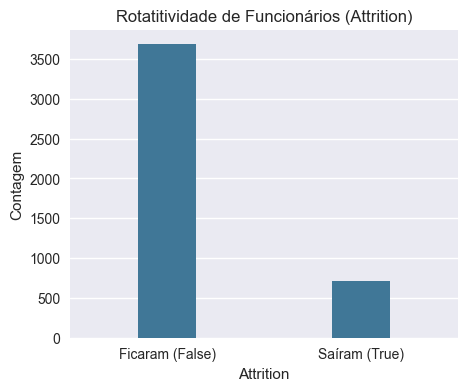

In [653]:
# Gr√°fico de barras do percentual de pessoas que sa√≠ram da empresa
plt.figure(figsize=(5, 4))
sns.countplot(x='Attrition', data=df, color='#327BA5', width=0.3)
plt.title('Rotatitividade de Funcion√°rios (Attrition)')
plt.xlabel('Attrition')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Ficaram (False)', 'Sa√≠ram (True)'])
plt.show()

## Boxplots para Visualizar os Outliers

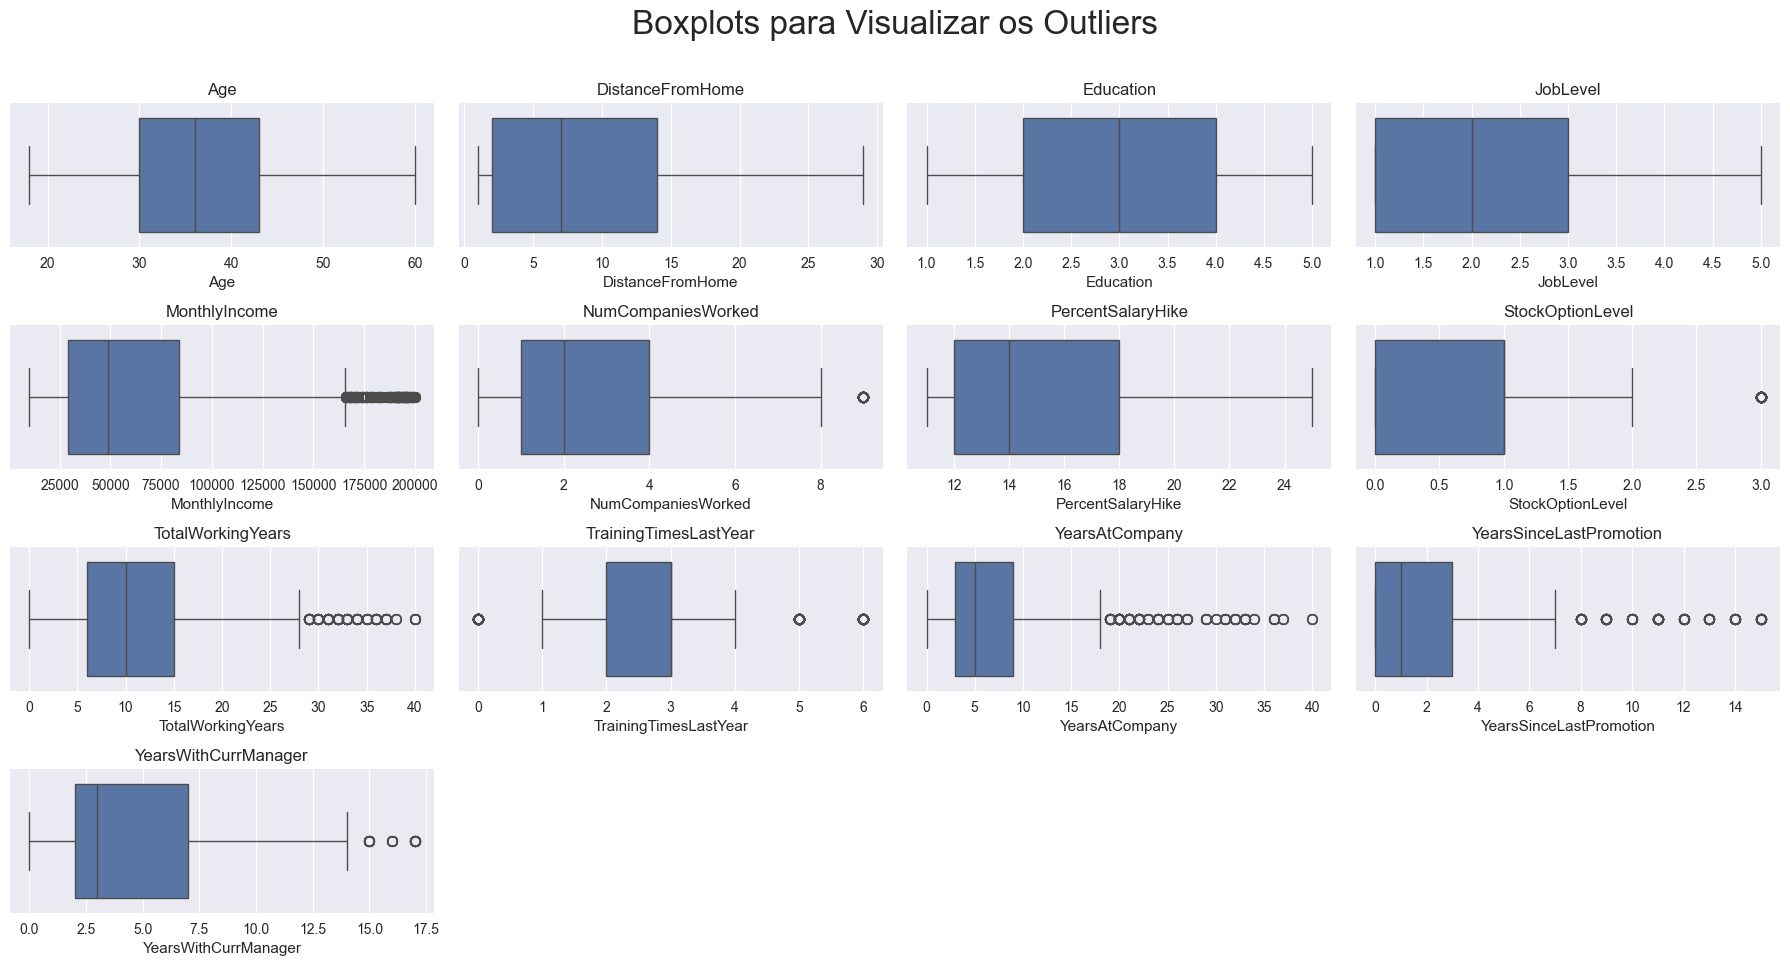

In [654]:
# Seleciona apenas colunas num√©ricas (exceto EmployeeID)
num_cols = df.select_dtypes(include=['int64']).columns.drop('EmployeeID')

# Define o tamanho da figura
plt.figure(figsize=(18, 12))
plt.suptitle('Boxplots para Visualizar os Outliers', fontsize=24)

# Loop para criar os subplots dos boxplots
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=col, data=df, orient='h')
    plt.title(col, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajusta o layout para n√£o sobrepor o t√≠tulo
plt.show()

### An√°lise de Distribui√ß√£o e Outliers com Boxplots  

- Vari√°veis com Distribui√ß√£o Normal e Sem Outliers Relevantes:  
`Age`, `DistanceFromHome`, `PercentSalaryHike`  
Estas vari√°veis apresentam uma distribui√ß√£o relativamente sim√©trica, com a mediana pr√≥xima ao centro da caixa (IQR).  
Os outliers presentes s√£o poucos e pr√≥ximos aos limites, n√£o indicando anomalias extremas.

- Vari√°veis com Assimetria √† Direita e Outliers Esperados:  
`MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`, `YearsSinceLastPromotion`  
Todas estas vari√°veis, ligadas √† remunera√ß√£o e ao tempo de servi√ßo, apresentam uma cauda longa √† direita.  
Isso √© um padr√£o esperado em dados de RH: a maioria dos funcion√°rios se concentra nos valores mais baixos (sal√°rios de entrada, menos tempo de casa),  
com um n√∫mero menor de funcion√°rios (geralmente executivos e s√™niores) representando os outliers com valores muito altos.

- Vari√°veis Ordinais e de Contagem:  
`JobLevel`, `StockOptionLevel`, `NumCompaniesWorked`, `TrainingTimesLastYear`  
Estas vari√°veis representam contagens ou n√≠veis. Os boxplots mostram a concentra√ß√£o dos dados em valores baixos.  
Por exemplo, a maioria dos funcion√°rios est√° nos n√≠veis de cargo 1 e 2, e a maioria teve entre 2 e 3 treinamentos no √∫ltimo ano.  

**Decis√£o:** Todos os outliers foram mantidos no dataset. 

Eles n√£o representam erros de dados, mas sim casos reais e importantes para o neg√≥cio (ex: executivos com altos sal√°rios, funcion√°rios com longa carreira).  
A remo√ß√£o desses pontos poderia enviesar o modelo e comprometer sua capacidade de entender os perfis de funcion√°rios mais experientes, que s√£o cruciais para a reten√ß√£o.

## Histogramas para Visualizar a Distribui√ß√£o das Vari√°veis

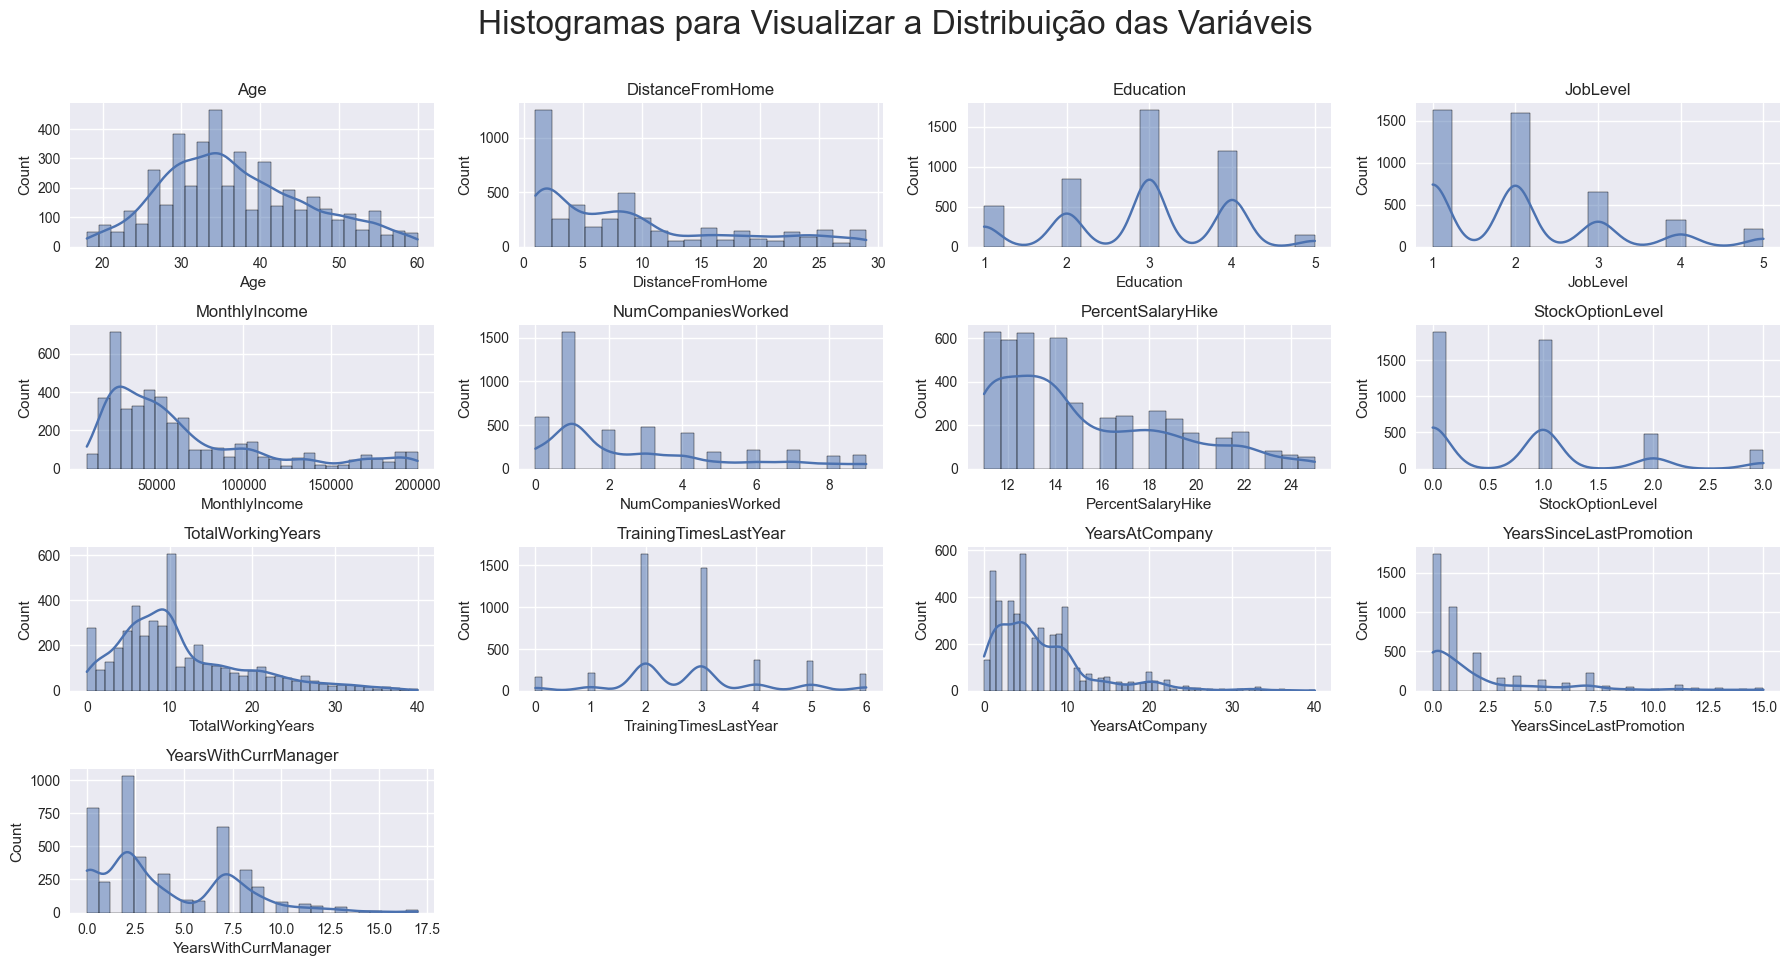

In [655]:
# Seleciona apenas colunas num√©ricas (exceto EmployeeID)
num_cols = df.select_dtypes(include=['int64']).columns.drop('EmployeeID')

# Define o tamanho da figura
plt.figure(figsize=(18, 12))
plt.suptitle('Histogramas para Visualizar a Distribui√ß√£o das Vari√°veis', fontsize=24)

# Loop para criar os subplots dos histogramas
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)  # 5 linhas, 4 colunas
    sns.histplot(df[col], kde=True)
    plt.title(col, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajusta o layout para n√£o sobrepor o t√≠tulo
plt.show()


### An√°lise de Frequ√™ncias com Histogramas

- **Assimetria √† Direita (Right-Skewed):**  
   Vari√°veis como `MonthlyIncome`, `TotalWorkingYears` e `YearsAtCompany` apresentam forte assimetria √† direita, com longa cauda.  
   Isso confirma o observado nos boxplots, a maioria dos funcion√°rios possui sal√°rios mais baixos e menos tempo de casa,  
   com poucos casos de valores muito altos (funcion√°rios s√™niores).

- **Distribui√ß√µes Multimodais (M√∫ltiplos Picos):**  
   Vari√°veis como `Education` e `JobLevel` mostram picos distintos, refletindo sua natureza ordinal.  
   Funcion√°rios est√£o concentrados em n√≠veis espec√≠ficos (ex: n√≠vel 3 de educa√ß√£o, n√≠veis 1 e 2 de cargo).  
   `StockOptionLevel` tamb√©m apresenta distribui√ß√£o com picos nos n√≠veis 0 e 1.

-  **Concentra√ß√£o em Valores Baixos:**  
   - `DistanceFromHome`: Forte concentra√ß√£o at√© 10 km, sugerindo que a maioria mora perto do trabalho.  
   - `YearsSinceLastPromotion`: Pico expressivo em 0 e 1 ano, indicando que muitos foram promovidos recentemente, ou h√° um grupo estagnado h√° v√°rios anos.

-  **Distribui√ß√£o Aproximadamente Normal:**  
   A vari√°vel `Age` se aproxima de uma distribui√ß√£o normal, com concentra√ß√£o entre 30 e 40 anos.

**Conclus√£o:**  
A combina√ß√£o de boxplots e histogramas aprofunda a compreens√£o das vari√°veis.  
Identifiquei os outliers como casos reais e importantes, s√£o padr√µes comuns em dados de RH e e relevantes para a modelagem preditiva.


## Correla√ß√£o entre as Vari√°veis

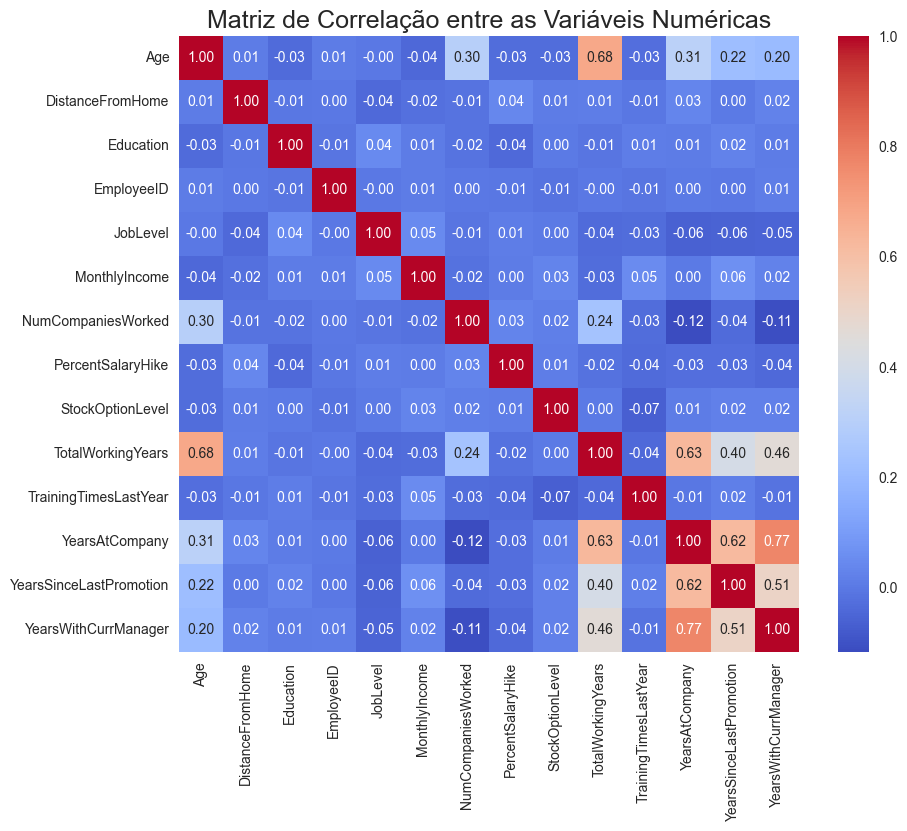

In [656]:
# Matriz de correla√ß√£o entre as vari√°veis num√©ricas

# Define o tamanho da figura para 12x10 polegadas
plt.figure(figsize=(10, 8))

# Cria o mapa de calor com a matriz de correla√ß√£o entre vari√°veis num√©ricas
# - numeric_only=True: considera apenas colunas num√©ricas
# - annot=True: exibe os valores dentro das c√©lulas
# - fmt=".2f": formata os valores com 2 casas decimais
# - cmap="coolwarm": define a paleta de cores (azul a vermelho)
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")

# Adiciona o t√≠tulo ao gr√°fico
plt.title('Matriz de Correla√ß√£o entre as Vari√°veis Num√©ricas', fontsize=18)

# Exibe o gr√°fico
plt.show()

A matriz de correla√ß√£o (heatmap) foi utilizada para quantificar a rela√ß√£o linear entre as vari√°veis num√©ricas.  

1. **Correla√ß√µes Positivas Fortes (Esperadas):**  
   - Correla√ß√£o alta entre `YearsAtCompany` e `YearsWithCurrManager` (0.77):  
   indica que, para muitos funcion√°rios, o tempo na empresa √© semelhante ao tempo com o mesmo gestor.  
   - `TotalWorkingYears` est√° fortemente correlacionado com `Age` (0.68) e `YearsAtCompany` (0.63), o que √© esperado.

2. **Correla√ß√µes Negativas (Fracas) com a Vari√°vel Alvo (`Attrition`):**  
   - `Attrition` tem correla√ß√µes negativas fracas com `TotalWorkingYears` (-0.17), `Age` (-0.16) e `YearsWithCurrManager` (-0.16).  
   - Isso sugere que funcion√°rios com mais idade, mais experi√™ncia e mais tempo com o mesmo gestor tendem a permanecer mais tempo na empresa.

3. **Implica√ß√µes para a Modelagem ‚Äì Risco de Multicolinearidade:**  
   - As fortes correla√ß√µes entre as vari√°veis de tempo (`TotalWorkingYears`, `YearsAtCompany`, `YearsWithCurrManager`, `YearsSinceLastPromotion`) e com `Age` apontam para poss√≠vel **multicolinearidade**.  
   - Algoritmos como Random Forest e XGBoost lidam bem com isso, mas a interpreta√ß√£o da import√¢ncia das features pode ser prejudicada.  
   - Exemplo: o modelo pode "dividir" a import√¢ncia entre `YearsAtCompany` e `TotalWorkingYears`, dificultando entender qual √© mais relevante para o churn.


## Quais caracter√≠sticas diferenciam os funcion√°rios que saem dos que ficam?

### An√°lise Bivariada: Vari√°veis Num√©ricas vs. Attrition

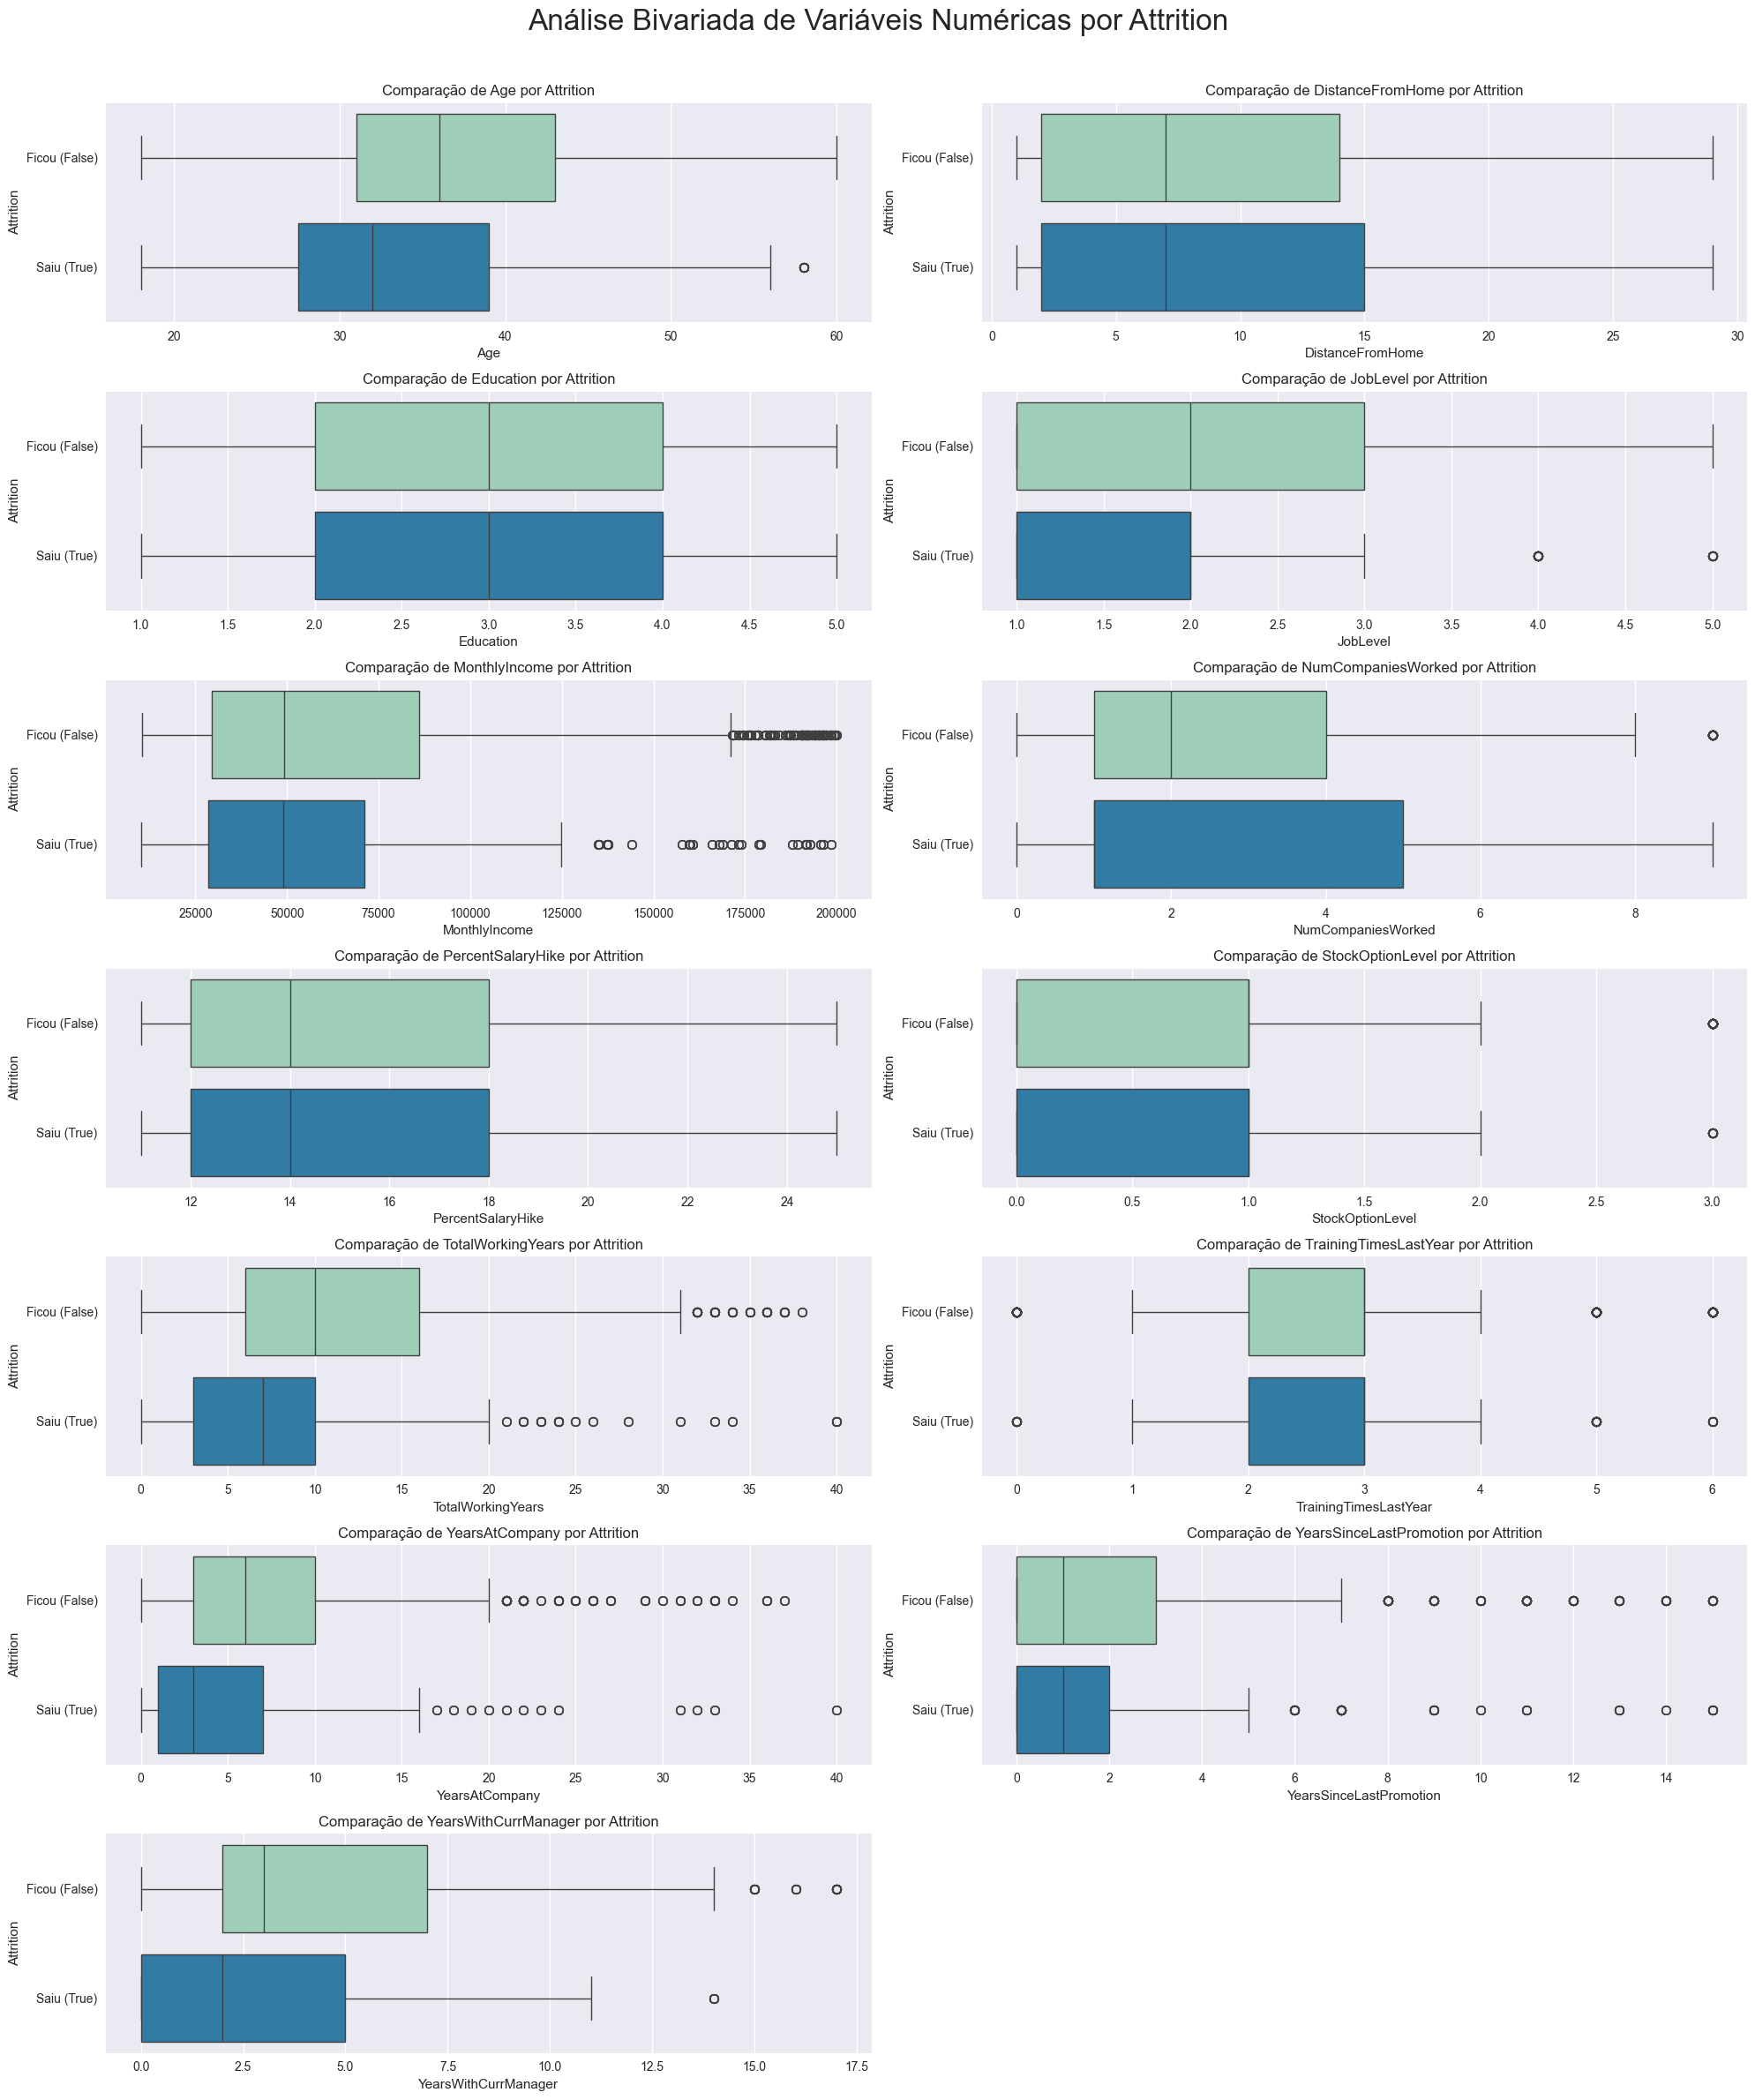

In [657]:
# Seleciona as colunas num√©ricas de interesse, excluindo o ID
numeric_cols = df.select_dtypes(include=['int64']).columns.drop('EmployeeID')

# Define o tamanho da figura
plt.figure(figsize=(20, 25)) # Aumentei um pouco a altura para os gr√°ficos n√£o ficarem apertados
plt.suptitle('An√°lise Bivariada de Vari√°veis Num√©ricas por Attrition', fontsize=24)

# Loop para criar os subplots
for i, col in enumerate(numeric_cols):
    # Adiciona um subplot √† grade (7 linhas, 2 colunas) - mais leg√≠vel
    plt.subplot(7, 2, i + 1)
    
    # Para o boxplot horizontal, trocamos x e y
    # A vari√°vel categ√≥rica 'Attrition' vai para o eixo y
    # A vari√°vel num√©rica 'col' vai para o eixo x
    sns.boxplot(x=col, y='Attrition', data=df, hue='Attrition', palette='YlGnBu', legend=False, orient='h')
    
    plt.title(f'Compara√ß√£o de {col} por Attrition', fontsize=12)
    # Trocamos para set_yticks e set_yticklabels
    plt.yticks([0, 1], ['Ficou (False)', 'Saiu (True)']) 
    plt.ylabel('Attrition')
    plt.xlabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajusta o layout para n√£o sobrepor o t√≠tulo
plt.show()

#### An√°lise Bivariada de Vari√°veis Num√©ricas por Attrition

Para entender as caracter√≠sticas que diferenciam os funcion√°rios que deixam a empresa (turnover) dos que permanecem,  
foram gerados boxplots comparativos para cada vari√°vel num√©rica em rela√ß√£o √† vari√°vel alvo `Attrition`.

- **Idade e Experi√™ncia (Sinal Forte):**  
Vari√°veis como `Age`, `TotalWorkingYears`, `YearsAtCompany` e `YearsWithCurrManager` mostram que os funcion√°rios que saem  
tendem a ser mais jovens e com menos experi√™ncia. A mediana do grupo que "Saiu" √© visivelmente menor em todas elas.

**Hip√≥tese:** Funcion√°rios mais jovens, menos experientes e com pouco tempo na empresa ou com o gestor atual s√£o mais propensos a sair.

- **Remunera√ß√£o e Cargo (Sinal Forte):**  
As vari√°veis `MonthlyIncome` e `JobLevel` indicam que funcion√°rios que saem ocupam cargos mais baixos e t√™m sal√°rios menores.

**Hip√≥tese:** Progress√£o de carreira e remunera√ß√£o s√£o fatores importantes para reten√ß√£o.

- **Engajamento e Oportunidades (Sinal Moderado):**  
Vari√°veis como `NumCompaniesWorked` e `StockOptionLevel` mostram padr√µes relevantes.  
Quem saiu tende a ter mudado mais de empresa antes e a n√£o possuir stock options.

**Hip√≥tese:** Ter hist√≥rico de trocas frequentes de trabalho e n√£o ter incentivos de longo prazo pode estar ligado √† decis√£o de sair.

- **Vari√°veis com Pouca Diferen√ßa Visual:**  
Vari√°veis como `DistanceFromHome`, `PercentSalaryHike` e `TrainingTimesLastYear` n√£o apresentam diferen√ßa clara entre os grupos.

**Hip√≥tese:** Sozinhas, essas vari√°veis t√™m pouco poder explicativo. Podem ganhar relev√¢ncia em combina√ß√£o com outras no modelo.


### An√°lise de Vari√°veis Categ√≥ticas vs. Attrition

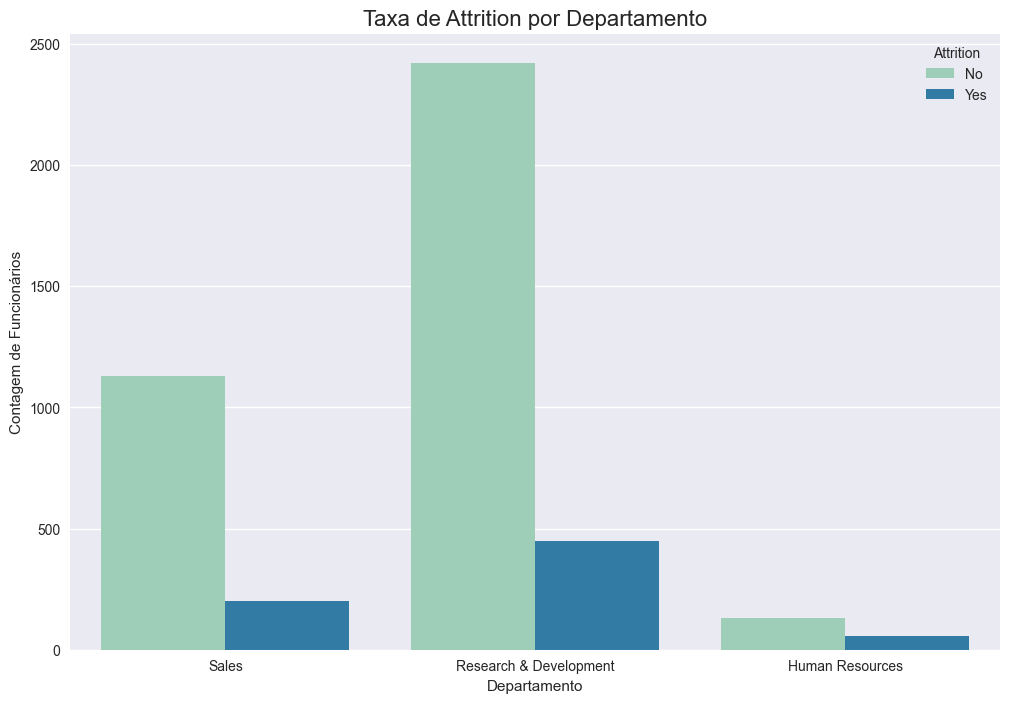

In [658]:
# --- Attrition por Departamento ---
plt.figure(figsize=(12, 8))
sns.countplot(x='Department', hue='Attrition', data=df, palette='YlGnBu')
plt.title('Taxa de Attrition por Departamento', fontsize=16)
plt.ylabel('Contagem de Funcion√°rios')
plt.xlabel('Departamento')
plt.show()

#### Taxa de Attrition por Departamento

O departamento de Pesquisa e Desenvolvimento (Research & Development) possui o maior n√∫mero absoluto de funcion√°rios e,  
consequentemente, o maior n√∫mero absoluto de sa√≠das.

No entanto, ao analisar a propor√ß√£o de sa√≠das em rela√ß√£o ao total de cada departamento,  
os departamentos de Vendas (Sales) e Recursos Humanos (Human Resources) apresentam uma taxa de churn visualmente maior.  

O departamento de RH, em particular, parece ter a maior taxa proporcional de sa√≠das.

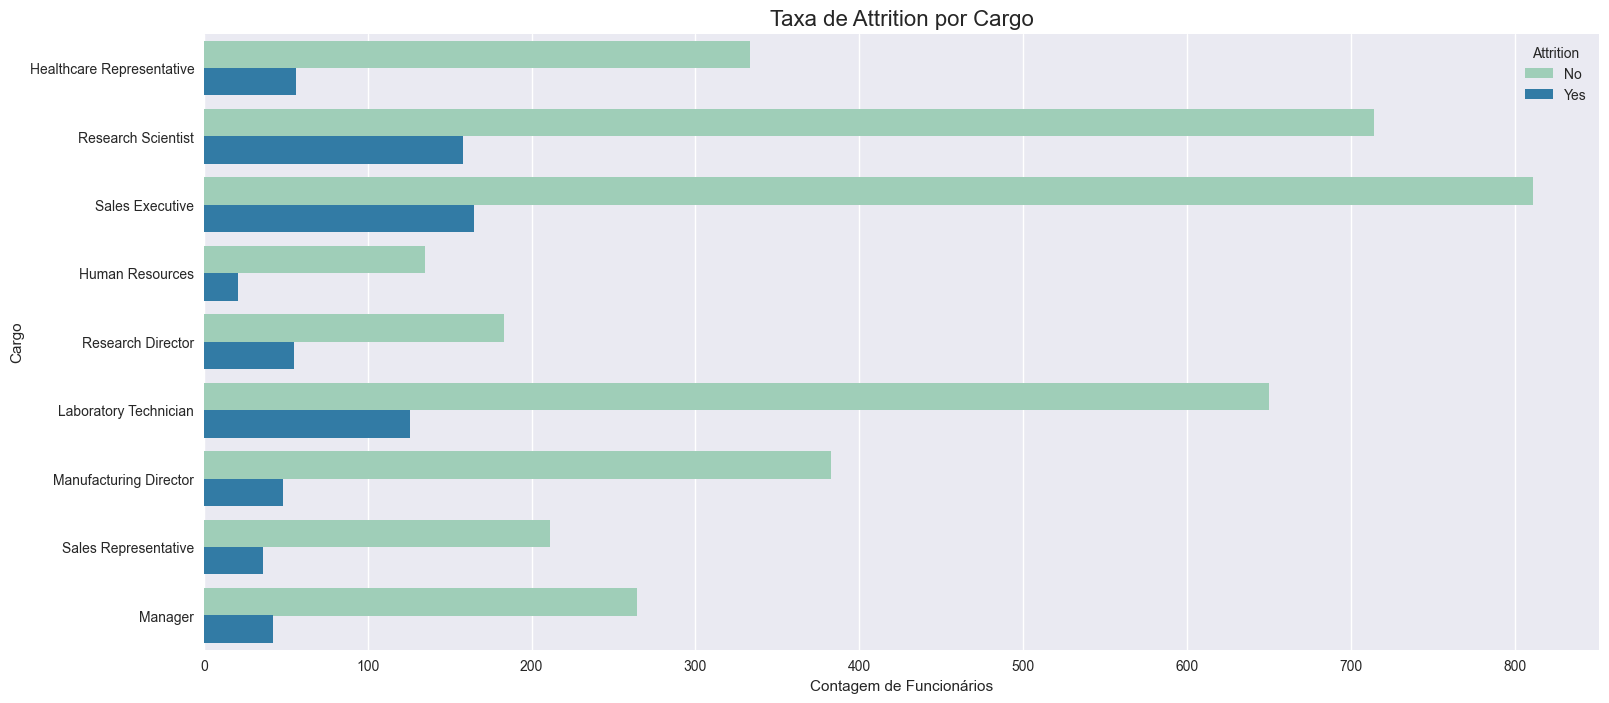

In [659]:
# --- Attrition por Cargo (JobRole) ---
plt.figure(figsize=(18, 8))
sns.countplot(y='JobRole', hue='Attrition', data=df, palette='YlGnBu')
plt.title('Taxa de Attrition por Cargo', fontsize=16)
plt.xlabel('Contagem de Funcion√°rios')
plt.ylabel('Cargo')
plt.show()

#### Taxa de Attrition por Cargo (JobRole)

A an√°lise por cargo revela padr√µes muito distintos.

- Cargos de Alta Rotatividade: Cargos como Laboratory Technician, Sales Representative e Human Resources  
mostram uma propor√ß√£o significativamente alta de churn (barras azuis grandes em rela√ß√£o √†s verdes).

- Cargos de Baixa Rotatividade: Por outro lado, cargos de lideran√ßa ou maior senioridade,  
como Manager, Research Director e Manufacturing Director, exibem uma taxa de sa√≠da muito baixa, indicando alta reten√ß√£o.

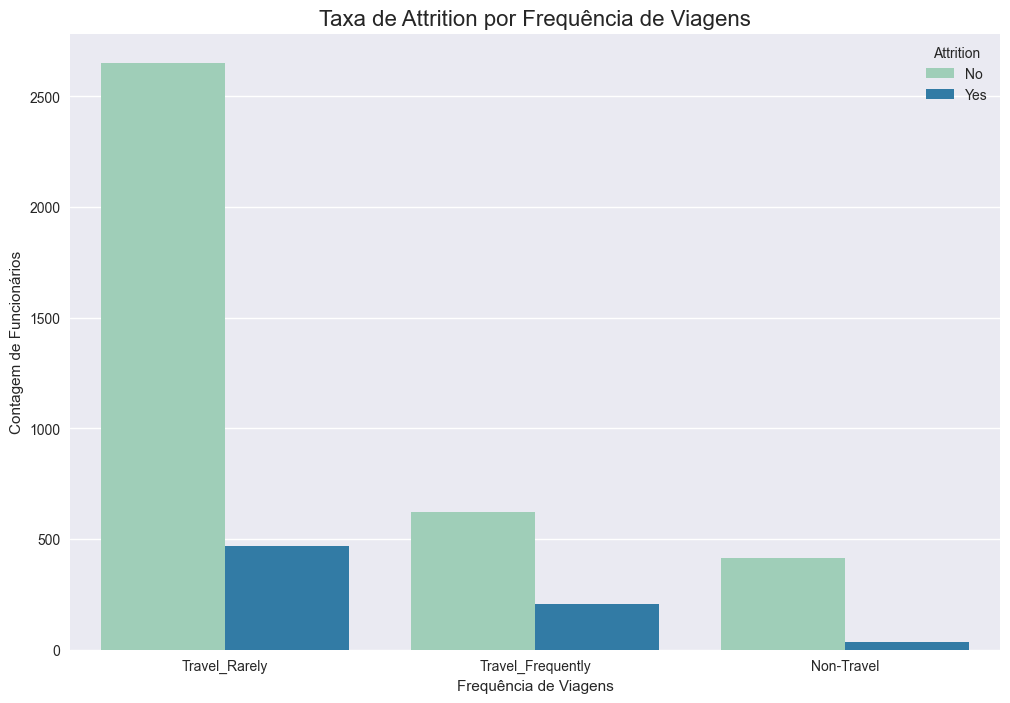

In [660]:
# --- Attrition por Viagens a Neg√≥cio (BusinessTravel) ---
plt.figure(figsize=(12, 8))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='YlGnBu')
plt.title('Taxa de Attrition por Frequ√™ncia de Viagens', fontsize=16)
plt.ylabel('Contagem de Funcion√°rios')
plt.xlabel('Frequ√™ncia de Viagens')
plt.show()

#### Taxa de Attrition por Frequ√™ncia de Viagens (BusinessTravel)

H√° uma correla√ß√£o muito clara entre a frequ√™ncia de viagens e a probabilidade de um funcion√°rio sair.

A categoria Travel_Frequently (viaja frequentemente) possui, de longe, a maior taxa de rotatividade proporcional.  
Em contraste, a categoria Non-Travel (n√£o viaja) apresenta a menor taxa de sa√≠da, com uma barra de churn quase insignificante.

#### Conclus√£o da An√°lise Categ√≥rica

Fatores como o cargo, a frequ√™ncia de viagens e o departamento s√£o preditores muito fortes da rotatividade.  

O perfil com maior risco parece ser o de funcion√°rios em cargos mais operacionais (T√©cnico de Laborat√≥rio e Representante de Vendas),  
que viajam com frequ√™ncia, especialmente nos departamentos de Vendas e RH.

# Feature Engineering

Para treinar o modelo, criarei as vari√°veis dummy.  
Por√©m, antes disso, √© preciso excluir vari√°veis que s√£o altamente relacionadas ou que podem introduzir vi√©s na an√°lise.

Vari√°veis exclu√≠das:

- `Gender` e `MaritalStatus`: removidas por n√£o apresentarem correla√ß√£o relevante com a vari√°vel alvo (Attrition)  
e por potencial risco de introdu√ß√£o de vi√©s (bias), especialmente no caso de Gender.

- `EducationField`: eliminada por apresentar sobreposi√ß√£o conceitual e alta similaridade com JobRole,  
que ser√° mantida por agregar mais valor √† an√°lise funcional do colaborador.

- `EmployeeID`: exclu√≠da pois √© o identificador do funcion√°rio.

Depois, criar vari√°veis dummy: `Department`, `BusinessTravel` e `JobRole`

## Excluindo as vari√°veis que n√£o s√£o relevantes para o modelo

In [661]:
# Excluindo colunas que n√£o ser√£o utilizadas no modelo
cols_to_drop = ['EmployeeID', 'Gender', 'MaritalStatus', 'EducationField']
df_model = df.drop(columns=cols_to_drop, axis=1)

# Prepara√ß√£o dos Dados para o Modelo

## Pr√©-Processamento dos Dados

Nesta etapa, foram realizadas as seguintes a√ß√µes para preparar os dados para a modelagem preditiva:

- **Defini√ß√£o da vari√°vel alvo (`y`)**: a coluna `Attrition`, que indica se o colaborador saiu (1) ou permaneceu (0) na empresa.
- **Separa√ß√£o das vari√°veis preditoras (`X`)**: todas as demais colunas, exceto `Attrition`.
- **Codifica√ß√£o de vari√°veis categ√≥ricas**: foi aplicado `pd.get_dummies()` apenas nas colunas categ√≥ricas de `X`,  
utilizando o par√¢metro `drop_first=True` para evitar multicolinearidade.

Essas transforma√ß√µes garantem que os dados estejam em formato num√©rico e compat√≠veis com os algoritmos de machine learning utilizados nas etapas seguintes.
Antes de realizar a transforma√ß√£o das vari√°veis categ√≥ricas em dummies, separei a vari√°vel Attrition,  
que √© a vari√°vel alvo do modelo, das demais vari√°veis independentes. 

A separa√ß√£o da vari√°vel alvo √© uma etapa essencial, pois, ao criar as vari√°veis dummies,  
a vari√°vel alvo n√£o deve ser inclu√≠da no processo, j√° que ela ser√° utilizada para treinar e avaliar o modelo.

Ap√≥s essa separa√ß√£o, as vari√°veis independentes restantes foram convertidas para vari√°veis dummies (One-Hot Encoding),  
transformando as vari√°veis categ√≥ricas em novas colunas bin√°rias.

Isso permite que o modelo de machine learning entenda essas vari√°veis e possa utilizar para prever a vari√°vel Attrition.

In [662]:
# A vari√°vel alvo √© 'Attrition', mas est√° como texto ("Yes"/"No") - ("True"/"False")
# O primeiro passo √© converter para booleana
df_model['Attrition'] = df_model['Attrition'].map({'Yes': 1, 'No': 0}).astype(int)
# Verificando os tipos de dados novamente
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4391 entries, 0 to 4409
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4391 non-null   int64 
 1   Attrition                4391 non-null   int64 
 2   BusinessTravel           4391 non-null   object
 3   Department               4391 non-null   object
 4   DistanceFromHome         4391 non-null   int64 
 5   Education                4391 non-null   int64 
 6   JobLevel                 4391 non-null   int64 
 7   JobRole                  4391 non-null   object
 8   MonthlyIncome            4391 non-null   int64 
 9   NumCompaniesWorked       4391 non-null   int64 
 10  PercentSalaryHike        4391 non-null   int64 
 11  StockOptionLevel         4391 non-null   int64 
 12  TotalWorkingYears        4391 non-null   int64 
 13  TrainingTimesLastYear    4391 non-null   int64 
 14  YearsAtCompany           4391 non-null   int6

## Vari√°vel Alvo e Preditoras (com cria√ß√£o das dummy)

In [663]:
# Separando a vari√°vel-alvo antes de criar as dummies
df = df_model.drop(columns='Attrition') # vari√°veis preditoras ou features
y = df_model['Attrition'] # vari√°vel alvo

X = df

# Convertendo vari√°veis categ√≥ricas em vari√°veis dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

## Divis√£o do Conjunto de Dados (Train/Test Split)

Antes de treinar o modelo, dividimos os dados em conjunto de treino e teste.  
Para isso, usamos a fun√ß√£o train_test_split do sklearn, com as seguintes configura√ß√µes:

- **Tamanho do Conjunto de Teste:** 30% dos dados foram destinados ao conjunto de teste (test_size=0.3),  
o que permite que o modelo seja avaliado com uma boa quantidade de dados n√£o vistos.

- **Random State:** A configura√ß√£o random_state=42 foi usada para garantir a reprodutibilidade da divis√£o.  
Isso significa que, sempre que rodarmos o c√≥digo, a divis√£o dos dados ser√° a mesma, facilitando a compara√ß√£o dos resultados.

- **Stratify:** Ao usar Stratify=y, garantimos que a distribui√ß√£o da vari√°vel alvo Attrition seja mantida de forma proporcional  
tanto no conjunto de treino quanto no de teste. Isso √© importante em problemas de classifica√ß√£o desbalanceada,  
como o caso da rotatividade de funcion√°rios, onde a maioria dos funcion√°rios n√£o saem da empresa.

In [664]:
# dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelagem Preditiva (XGBoost)

## Criando o Modelo XGBoost Base

In [665]:
# Criando o modelo XGBoost Base
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

### Valida√ß√£o Cruzada

A valida√ß√£o cruzada garante que o modelo seja testado em diferentes divis√µes dos dados,  
evitando que a avalia√ß√£o dependa de uma √∫nica amostra.

Usei a t√©cnica Stratified K-Fold para manter o equil√≠brio da vari√°vel de sa√≠da em todas as divis√µes,  
j√° que os dados est√£o desbalanceados.

In [666]:
# cross_validate: realiza a valida√ß√£o cruzada
# StratifiedKFold: garante que a propor√ß√£o de classes seja mantida em cada fold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# score: calcula as m√©tricas de avalia√ß√£o
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = cross_validate(xgb_model, X_train, y_train, cv=cv_strategy, scoring=scoring_metrics, return_train_score=False)


#### Resultados da Valida√ß√£o Cruzada

In [667]:
print("Resultados da Valida√ß√£o Cruzada (Desempenho no Treino XGBoost):")
for metric in scoring_metrics:
    mean_score = results[f'test_{metric}'].mean()
    std_score = results[f'test_{metric}'].std()
    print(f"  - {metric.capitalize()}: ({mean_score:.4f} (+/- {std_score:.4f})")

Resultados da Valida√ß√£o Cruzada (Desempenho no Treino XGBoost):
  - Accuracy: (0.9574 (+/- 0.0062)
  - Precision: (0.9205 (+/- 0.0282)
  - Recall: (0.8061 (+/- 0.0346)
  - F1: (0.8588 (+/- 0.0218)
  - Roc_auc: (0.9486 (+/- 0.0150)


#### Valida√ß√£o Cruzada - Avalia√ß√£o do Desempenho no Treinamento

A valida√ß√£o cruzada com `StratifiedKFold` (5 folds) foi utilizada para garantir uma avalia√ß√£o robusta e evitar overfitting,  
mantendo a propor√ß√£o da vari√°vel alvo em cada parti√ß√£o.  

Os resultados mostram que o modelo apresenta desempenho s√≥lido e est√°vel:

- **Acur√°cia**: alta taxa de acertos gerais.
- **Precis√£o**: poucos falsos positivos (quando o modelo prev√™ que algu√©m vai sair, geralmente est√° certo).
- **Recall**: boa capacidade de identificar os funcion√°rios que realmente saem.
- **F1-score**: equil√≠brio entre precis√£o e recall.
- **ROC AUC**: excelente separa√ß√£o entre as classes (sair ou ficar).

A baixa varia√ß√£o entre os folds (+/-) refor√ßa a estabilidade do modelo.

## Treinando o Modelo

In [668]:
# Treinando o modelo
xgb_model.fit(X_train, y_train)

# Fazendo previs√µes no conjunto de teste
y_pred = xgb_model.predict(X_test)

## Avalia√ß√£o do Modelo Base


Resultados da Avalia√ß√£o do Modelo XGBoost Base:
  - Acur√°cia: 0.9825
  - Precis√£o: 0.9479
  - Recall: 0.9434
  - F1-Score: 0.9456
  - ROC AUC: 0.9707
--------------------------------------------------
Verdadeiros Negativos (VN): 1095
Falsos Positivos (FP): 11
Falsos Negativos (FN): 12
Verdadeiros Positivos (VP): 200
--------------------------------------------------


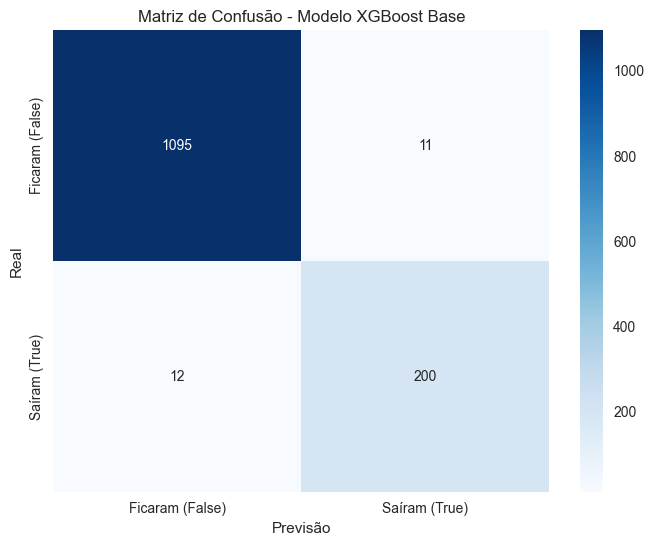


Relat√≥rio de Classifica√ß√£o:
                 precision    recall  f1-score   support

Ficaram (False)       0.99      0.99      0.99      1106
  Sa√≠ram (True)       0.95      0.94      0.95       212

       accuracy                           0.98      1318
      macro avg       0.97      0.97      0.97      1318
   weighted avg       0.98      0.98      0.98      1318



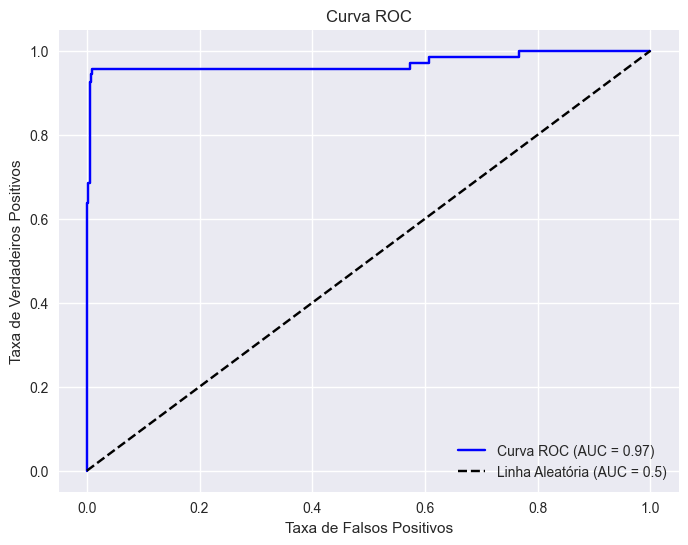

In [669]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("\nResultados da Avalia√ß√£o do Modelo XGBoost Base:")
print(f"  - Acur√°cia: {accuracy:.4f}")
print(f"  - Precis√£o: {precision:.4f}")
print(f"  - Recall: {recall:.4f}")
print(f"  - F1-Score: {f1:.4f}")
print(f"  - ROC AUC: {roc_auc:.4f}")
print("-" * 50)
# Matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)

# Atribui os valores
vn, fp, fn, vp = cm.ravel()

# Exibe os resultados
print(f"Verdadeiros Negativos (VN): {vn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdadeiros Positivos (VP): {vp}")
print("-" * 50)

# Matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ficaram (False)', 'Sa√≠ram (True)'], yticklabels=['Ficaram (False)', 'Sa√≠ram (True)'])
plt.title('Matriz de Confus√£o - Modelo XGBoost Base')
plt.xlabel('Previs√£o')
plt.ylabel('Real')
plt.show()

# Relat√≥rio de classifica√ß√£o
print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred, target_names=['Ficaram (False)', 'Sa√≠ram (True)']))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc), color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Linha Aleat√≥ria (AUC = 0.5)')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()


## Otimiza√ß√£o: Ajuste de Hiperpar√¢metros

In [670]:
# Otimiza√ß√£o de hiperpar√¢metros com GridSearchCV
param_grid = {
'max_depth': [3, 4, 6], # Profundidade da √°rvore
'learning_rate': [0.05, 0.1, 0.2], # Taxa de aprendizado
'n_estimators': [200, 300, 400], # N√∫mero de √°rvores
'gamma': [0.1, 0.5, 1], # Regulariza√ß√£o (maior = mais conservador)
'subsample': [0.8, 1.0], # Amostragem de dados
'colsample_bytree': [0.8, 1.0] # Amostragem de colunas
}

# Configurando a estrat√©gia de valida√ß√£o cruzada
grid_search = GridSearchCV(
estimator=xgb_model, # modelo XGBoost base
param_grid=param_grid,
scoring='f1', # Otimizando para o F1-Score, um bom equil√≠brio
cv=cv_strategy, # StratifiedKFold
n_jobs=-1, # Usa todos os processadores para acelerar
verbose=2 # Mostra o progresso da busca
)

# Executando a busca em grade
# Isso pode levar algum tempo dependendo do tamanho do conjunto de dados e da complexidade do modelo
grid_search.fit(X_train, y_train)

# Exibindo os melhores par√¢metros encontrados
print("Melhores par√¢metros encontrados:")
print(grid_search.best_params_)

# Exibindo o melhor score (F1-Score) encontrado
print(f"Melhor F1-Score: {grid_search.best_score_:.4f}")
best_xgb_model_optimized = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Melhores par√¢metros encontrados:
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Melhor F1-Score: 0.8778


### Ajuste Fino na Regulariza√ß√£o

In [671]:
# Agora que temos um modelo otimizado, vamos fazer um ajuste fino focando em regulariza√ß√£o
# C√≥pia do modelo otimizado para o ajuste fino
xgb_model_stage2 = xgb.XGBClassifier(
use_label_encoder=False,
eval_metric='logloss',
random_state=42,

# Par√¢metros otimizados da primeira busca:
colsample_bytree=1.0,
gamma=0.1,
learning_rate=0.05,
max_depth=6,
n_estimators=400,
subsample=0.8
)

# Novo grid de par√¢metros focando em regulariza√ß√£o
# Vamos explorar a regulariza√ß√£o L1 (reg_alpha) e L2 (reg_lambda)
param_grid_regularization = {
'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1], # Regulariza√ß√£o L1
'reg_lambda': [0.5, 1, 1.5, 2] # Regulariza√ß√£o L2
}

# Configurando a estrat√©gia de valida√ß√£o cruzada
grid_search_regularization = GridSearchCV(
estimator=xgb_model_stage2,
param_grid=param_grid_regularization,
scoring='f1',
cv=cv_strategy,
n_jobs=-1,
verbose=1
)

# Executando a busca em grade para regulariza√ß√£o
grid_search_regularization.fit(X_train, y_train)
print("Melhores par√¢metros de regulariza√ß√£o encontrados:")
print(grid_search_regularization.best_params_)

# Exibindo o melhor score (F1-Score) encontrado ap√≥s o ajuste fino
print(f"\nMelhor F1-Score FINAL (ap√≥s ajuste fino): {grid_search_regularization.best_score_:.4f}")
print("-" * 50)

# Avaliando o modelo otimizado com os melhores par√¢metros de regulariza√ß√£o
# Modelo final e otimizado salvo em uma vari√°vel
final_xgb_model = grid_search_regularization.best_estimator_
print("Modelo final otimizado:")
print(final_xgb_model)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores par√¢metros de regulariza√ß√£o encontrados:
{'reg_alpha': 0.1, 'reg_lambda': 0.5}

Melhor F1-Score FINAL (ap√≥s ajuste fino): 0.8735
--------------------------------------------------
Modelo final otimizado:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_j

## Avalia√ß√£o do Modelo Otimizado


Resultados da Avalia√ß√£o do Modelo XGBoost Otimizado:
  - Acur√°cia: 0.9886
  - Precis√£o: 0.9713
  - Recall: 0.9575
  - F1-Score: 0.9644
  - ROC AUC: 0.9747
--------------------------------------------------
Verdadeiros Negativos (VN): 1100
Falsos Positivos (FP): 6
Falsos Negativos (FN): 9
Verdadeiros Positivos (VP): 203
--------------------------------------------------


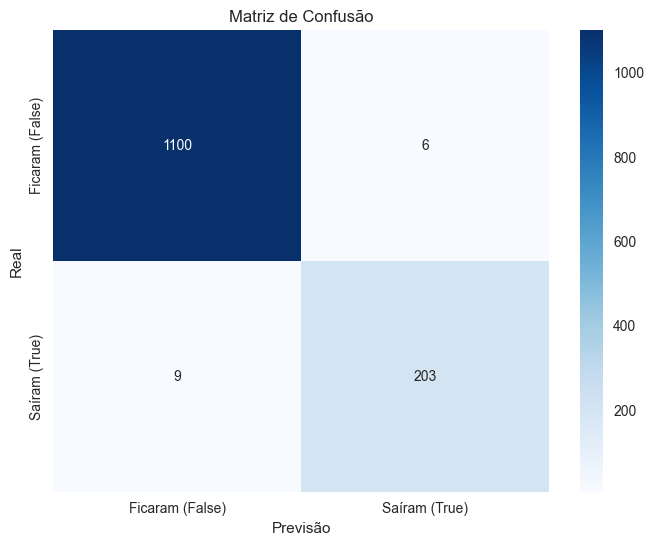


Relat√≥rio de Classifica√ß√£o:
                 precision    recall  f1-score   support

Ficaram (False)       0.99      0.99      0.99      1106
  Sa√≠ram (True)       0.97      0.96      0.96       212

       accuracy                           0.99      1318
      macro avg       0.98      0.98      0.98      1318
   weighted avg       0.99      0.99      0.99      1318



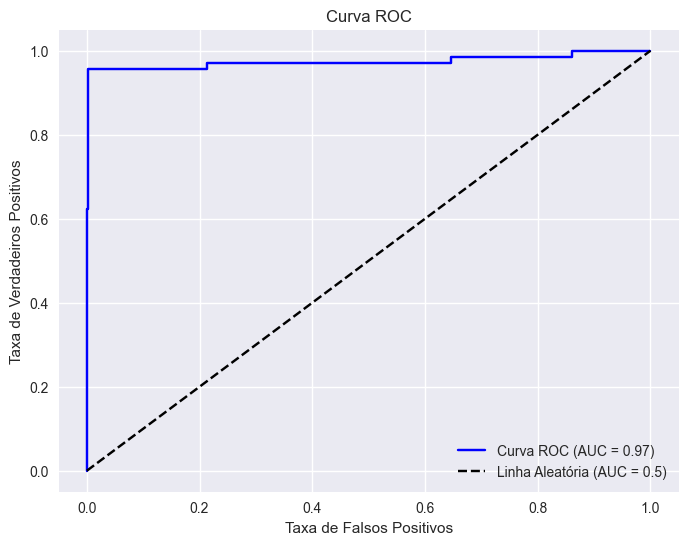

In [672]:
final_xgb_model = grid_search_regularization.best_estimator_

# Treina o modelo otimizado no conjunto de treino
final_xgb_model.fit(X_train, y_train)

# Faz previs√µes com o modelo otimizado
y_pred_opt = final_xgb_model.predict(X_test)
y_proba_opt = final_xgb_model.predict_proba(X_test)[:, 1]

# Avalia usando as previs√µes do modelo otimizado
accuracy = accuracy_score(y_test, y_pred_opt)
precision = precision_score(y_test, y_pred_opt)
recall = recall_score(y_test, y_pred_opt)
f1 = f1_score(y_test, y_pred_opt)
roc_auc = roc_auc_score(y_test, y_proba_opt)

print("\nResultados da Avalia√ß√£o do Modelo XGBoost Otimizado:")
print(f"  - Acur√°cia: {accuracy:.4f}")
print(f"  - Precis√£o: {precision:.4f}")
print(f"  - Recall: {recall:.4f}")
print(f"  - F1-Score: {f1:.4f}")
print(f"  - ROC AUC: {roc_auc:.4f}")
print("-" * 50)

# Matriz de confus√£o
cm = confusion_matrix(y_test, y_pred_opt)
vn, fp, fn, vp = cm.ravel()
print(f"Verdadeiros Negativos (VN): {vn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdadeiros Positivos (VP): {vp}")
print("-" * 50)

# Plot matriz de confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ficaram (False)', 'Sa√≠ram (True)'],
            yticklabels=['Ficaram (False)', 'Sa√≠ram (True)'])
plt.title('Matriz de Confus√£o')
plt.xlabel('Previs√£o')
plt.ylabel('Real')
plt.show()

# Relat√≥rio de classifica√ß√£o
print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred_opt, target_names=['Ficaram (False)', 'Sa√≠ram (True)']))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_opt)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Linha Aleat√≥ria (AUC = 0.5)')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()


## Import√¢ncia das vari√°veis

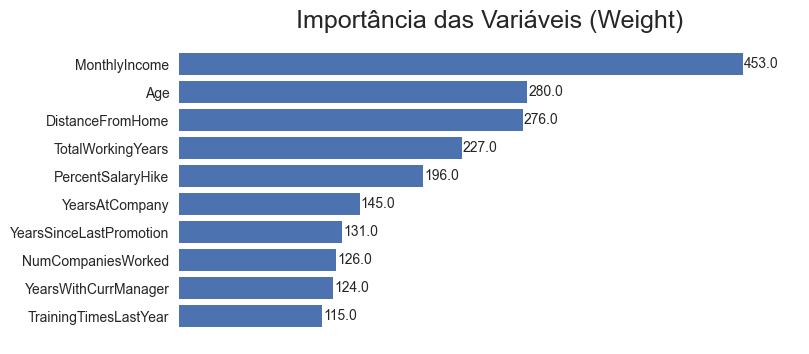

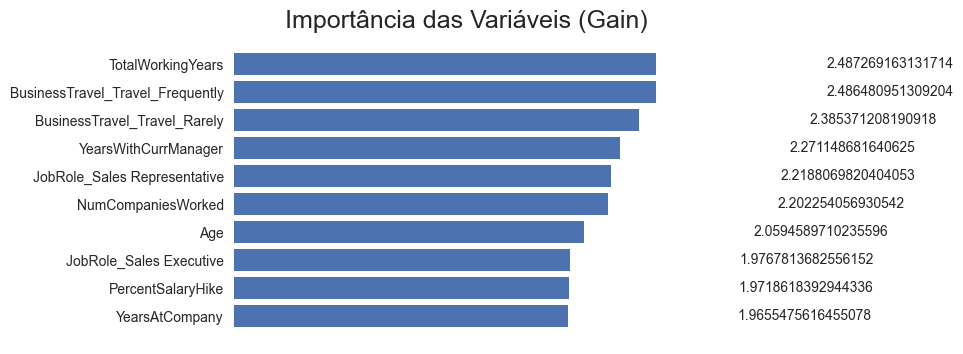

In [673]:
# Import√¢ncia das vari√°veis
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(8, 4))

# weight √© o n√∫mero de vezes que a vari√°vel foi usada para dividir os dados
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.8, ax=ax)
plt.xlabel('')  # Remove o t√≠tulo do eixo X
plt.ylabel('')  # Remove o t√≠tulo do eixo Y
plt.xticks([])  # Remove os valores do eixo X
ax.set_facecolor('white')
plt.title("Import√¢ncia das Vari√°veis (Weight)", fontsize=18)  # Tamanho da fonte do t√≠tulo

plt.show()

# Import√¢ncia das vari√°veis
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(6, 4))

# weight √© o n√∫mero de vezes que a vari√°vel foi usada para dividir os dados
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10, height=0.8, ax=ax)
plt.xlabel('')  # Remove o t√≠tulo do eixo X
plt.ylabel('')  # Remove o t√≠tulo do eixo Y
plt.xticks([])  # Remove os valores do eixo X
ax.set_facecolor('white')
plt.title("Import√¢ncia das Vari√°veis (Gain)", fontsize=18)  # Tamanho da fonte do t√≠tulo

plt.show()


## Curva de Aprendizagem

A curva de aprendizagem permite visualizar como o desempenho do modelo evolui √† medida que aumentamos o tamanho do conjunto de treinamento.  
Ela apresenta a pontua√ß√£o (neste caso, F1-score) tanto no conjunto de treinamento quanto no conjunto de valida√ß√£o (via cross-validation).

Essa curva √© √∫til para diagnosticar:

- Overfitting: quando o score de treino √© alto, mas o score de valida√ß√£o √© significativamente mais baixo.

- Underfitting: quando tanto o score de treino quanto o de valida√ß√£o s√£o baixos.

- Bom ajuste: quando os scores de treino e valida√ß√£o s√£o altos e pr√≥ximos.

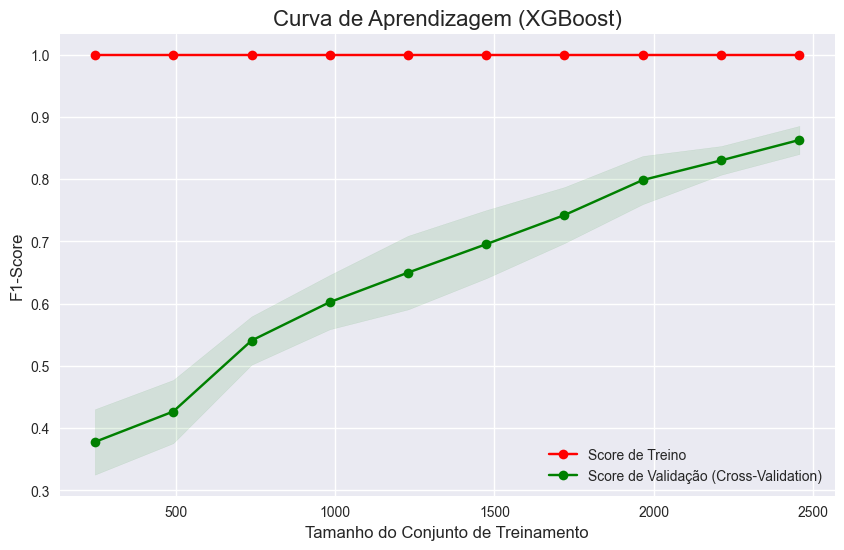

In [674]:

# Calcula os pontos para a curva de aprendizagem
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), # Gera 10 pontos de 10% a 100% do treino
    cv=cv_strategy, # mesmo modelo e estrat√©gia de CV j√° definido
    scoring='f1', # m√©trica que faz mais sentido (F1 √© √≥timo para desbalanceamento)
    n_jobs=-1,
    random_state=42
)

# Calcula as m√©dias e desvios padr√£o para plotagem
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plotando o gr√°fico
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score de Treino")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Score de Valida√ß√£o (Cross-Validation)")

plt.title("Curva de Aprendizagem (XGBoost)", fontsize=16)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Tamanho do Conjunto de Treinamento", fontsize=12)
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Curva de Valida√ß√£o do Hiperpar√¢metro (max_depth)

Esta curva mostra como o desempenho do modelo (F1-score) varia conforme ajustamos o hiperpar√¢metro max_depth (profundidade m√°xima das √°rvores). Ela apresenta os scores tanto no conjunto de treino quanto no conjunto de valida√ß√£o (via cross-validation).

√â √∫til para identificar o ponto ideal de complexidade do modelo, evitando:

- Overfitting: quando o desempenho no treino √© muito alto, mas cai na valida√ß√£o em valores maiores de max_depth.

- Underfitting: quando o desempenho √© baixo tanto no treino quanto na valida√ß√£o para valores pequenos de max_depth.

- Ajuste adequado: quando os scores de treino e valida√ß√£o s√£o altos e pr√≥ximos, indicando boa generaliza√ß√£o.

Train Mean F1 Scores: [0.53337522 0.97831335 1.         1.         1.        ]
Validation Mean F1 Scores: [0.35809054 0.81584466 0.88500022 0.87256736 0.87764321]


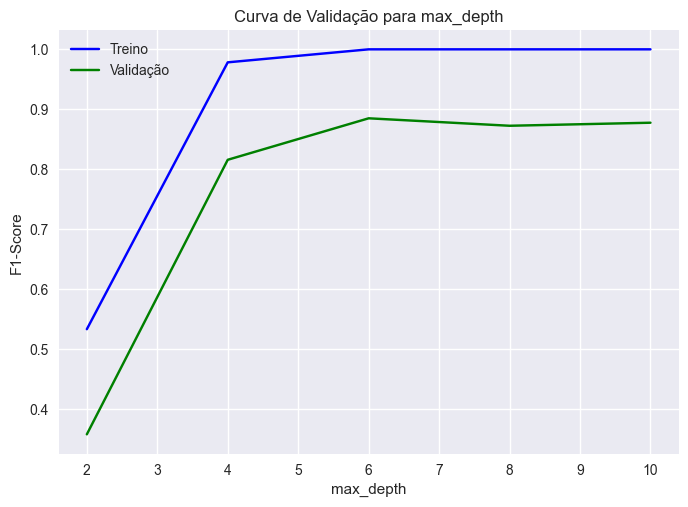

In [675]:
# Curva de Valida√ß√£o para o par√¢metro max_depth
param_range = [2, 4, 6, 8, 10]
train_scores, test_scores = validation_curve(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    X_train, y_train,
    param_name="max_depth",
    param_range=param_range,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

print("Train Mean F1 Scores:", train_mean)
print("Validation Mean F1 Scores:", test_mean)

plt.plot(param_range, train_mean, label="Treino", color="blue")
plt.plot(param_range, test_mean, label="Valida√ß√£o", color="green")
plt.xlabel("max_depth")
plt.ylabel("F1-Score")
plt.title("Curva de Valida√ß√£o para max_depth")
plt.legend()
plt.show()


## Curva Precision-Recall

Essa curva avalia o desempenho do modelo focando na capacidade de equil√≠brio entre precis√£o (propor√ß√£o de previs√µes positivas corretas) e recall (propor√ß√£o de positivos corretamente identificados).

Ela √© especialmente importante para bases desbalanceadas, como a de atri√ß√£o, pois mostra o trade-off entre capturar o maior n√∫mero poss√≠vel de positivos (recall) sem aumentar falsos positivos (baixar precis√£o).

O valor de Average Precision (AP) sintetiza essa rela√ß√£o, onde valores pr√≥ximos de 1 indicam bom equil√≠brio

Average Precision (AP): 0.9640


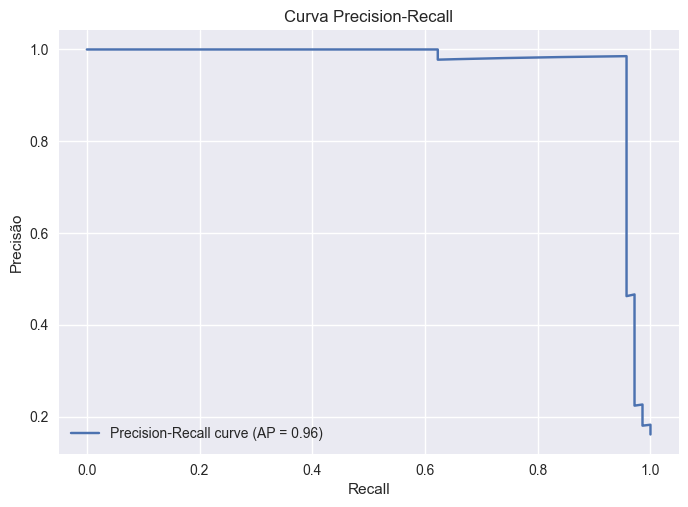

In [676]:
# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_opt)
ap_score = average_precision_score(y_test, y_proba_opt)

print(f"Average Precision (AP): {ap_score:.4f}")

plt.plot(recall, precision, label=f"Precision-Recall curve (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precis√£o")
plt.title("Curva Precision-Recall")
plt.legend()
plt.show()


# Modelagem Preditiva (Random Forest)

## Criando o Modelo Random Forest

In [677]:
# Criando o modelo base de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

## Treinando o Modelo

In [678]:
# Treinando o modelo
rf_model.fit(X_train, y_train)

# Fazendo previs√µes no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

### Valida√ß√£o Cruzada

In [679]:
# Definindo a estrat√©gia de valida√ß√£o cruzada
rf_scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
rf_results = cross_validate(rf_model, X_train, y_train, cv=cv_strategy, scoring=rf_scoring_metrics, return_train_score=False)

#### Resultados da Valida√ß√£o Cruzada

In [680]:
# Avaliando o modelo final otimizado com as m√©tricas de desempenho
print("Resultados da Valida√ß√£o Cruzada - Modelo Base Random Forest:")
for metric in rf_scoring_metrics:
    mean_score = rf_results[f'test_{metric}'].mean()
    std_score = rf_results[f'test_{metric}'].std()
    print(f"  - {metric.capitalize()}: {mean_score:.4f} (+/- {std_score:.4f})")

Resultados da Valida√ß√£o Cruzada - Modelo Base Random Forest:
  - Accuracy: 0.9613 (+/- 0.0092)
  - Precision: 0.9676 (+/- 0.0228)
  - Recall: 0.7859 (+/- 0.0467)
  - F1: 0.8667 (+/- 0.0339)
  - Roc_auc: 0.9742 (+/- 0.0104)


## Avalia√ß√£o do Modelo Base Random Forest


Relat√≥rio de Classifica√ß√£o (Random Forest Base):
              precision    recall  f1-score   support

   Ficou (0)       0.99      1.00      0.99      1106
    Saiu (1)       0.98      0.93      0.96       212

    accuracy                           0.99      1318
   macro avg       0.99      0.96      0.97      1318
weighted avg       0.99      0.99      0.99      1318

------------------------------------------------------------
Acur√°cia:  0.9863
Precis√£o:  0.9850
Recall:    0.9292
F1-Score:  0.9563
------------------------------------------------------------
Verdadeiros Negativos (VN): 1103
Falsos Positivos (FP):      3
Falsos Negativos (FN):      15
Verdadeiros Positivos (VP): 197


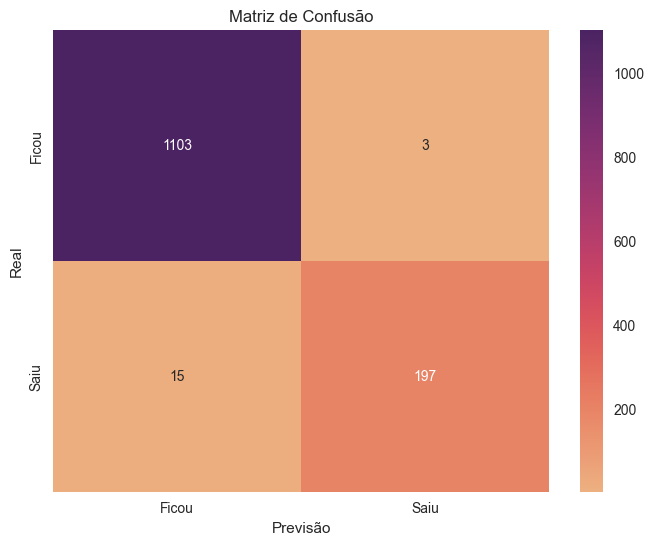


AUC Score Final (Random Forest): 0.9943


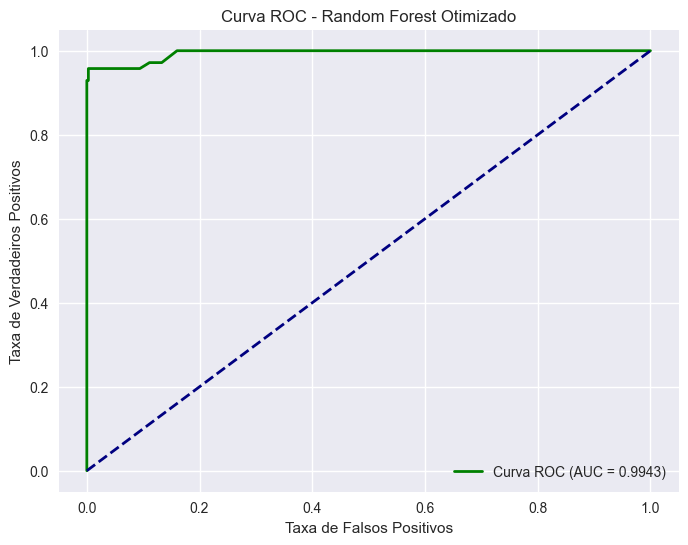

In [681]:
# Treinando o modelo final otimizado com os melhores hiperpar√¢metros
rf_model.fit(X_train, y_train)

# Fazendo previs√µes no conjunto de teste com o modelo final otimizado
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Avaliando o modelo final otimizado
print("\nRelat√≥rio de Classifica√ß√£o (Random Forest Base):")
print(classification_report(y_test, y_pred_rf, target_names=['Ficou (0)', 'Saiu (1)']))

# Avaliando o modelo
# M√©tricas
acuracia_rf = accuracy_score(y_test, y_pred_rf)
precisao_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Exibindo os resultados
print("-" * 60)
print(f"Acur√°cia:  {acuracia_rf:.4f}")
print(f"Precis√£o:  {precisao_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print("-" * 60)

# Matriz de Confus√£o Final
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Atribui os valores
vn, fp, fn, vp = cm_rf.ravel()

# Exibe os resultados
print(f"Verdadeiros Negativos (VN): {vn}")
print(f"Falsos Positivos (FP):      {fp}")
print(f"Falsos Negativos (FN):      {fn}")
print(f"Verdadeiros Positivos (VP): {vp}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='flare', xticklabels=['Ficou', 'Saiu'], yticklabels=['Ficou', 'Saiu'])
plt.title('Matriz de Confus√£o')
plt.xlabel('Previs√£o')
plt.ylabel('Real')
plt.show()

# Calcula o AUC Score final para o modelo Random Forest otimizado
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"\nAUC Score Final (Random Forest): {auc_rf:.4f}")

# Calcula os pontos da curva ROC para o modelo Random Forest otimizado
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Curva ROC (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest Otimizado')
plt.legend(loc="lower right")
plt.show()

## Otimiza√ß√£o do Random Forest

In [682]:
# Otimiza√ß√£o de hiperpar√¢metros com RandomizedSearchCV para Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None], # None = at√© que as folhas sejam puras
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] # Op√ß√µes padr√£o e eficientes
}

# Configurando a estrat√©gia de valida√ß√£o cruzada
rf_random_search = RandomizedSearchCV(
    estimator=rf_model, # O seu rf_model base
    param_distributions=param_dist_rf,
    n_iter=50,
    scoring='f1',
    cv=cv_strategy, # A mesma estrat√©gia de valida√ß√£o
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Iniciando a busca pelos melhores hiperpar√¢metros do Random Forest
rf_random_search.fit(X_train, y_train)

# Exibindo os melhores hiperpar√¢metros encontrados
print("Melhores Hiperpar√¢metros encontrados para o Random Forest:")
print(rf_random_search.best_params_)

# Exibindo o melhor score (F1-Score) encontrado na valida√ß√£o cruzada
print(f"\nMelhor F1-Score (na valida√ß√£o cruzada): {rf_random_search.best_score_:.4f}")

# Atribuindo o modelo otimizado √† vari√°vel final_rf_model
final_rf_model = rf_random_search.best_estimator_
print("Modelo final otimizado:")
print(final_rf_model)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores Hiperpar√¢metros encontrados para o Random Forest:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Melhor F1-Score (na valida√ß√£o cruzada): 0.8763
Modelo final otimizado:
RandomForestClassifier(max_features='log2', n_estimators=300, n_jobs=-1,
                       random_state=42)


### Avalia√ß√£o do Modelo Random Forest Otimizado


Relat√≥rio de Classifica√ß√£o (Random Forest Otimizado):
              precision    recall  f1-score   support

   Ficou (0)       0.99      1.00      0.99      1106
    Saiu (1)       0.99      0.94      0.96       212

    accuracy                           0.99      1318
   macro avg       0.99      0.97      0.98      1318
weighted avg       0.99      0.99      0.99      1318

------------------------------------------------------------
Acur√°cia:  0.9886
Precis√£o:  0.9852
Recall:    0.9434
F1-Score:  0.9639
------------------------------------------------------------
Verdadeiros Negativos (VN): 1103
Falsos Positivos (FP):      3
Falsos Negativos (FN):      12
Verdadeiros Positivos (VP): 200


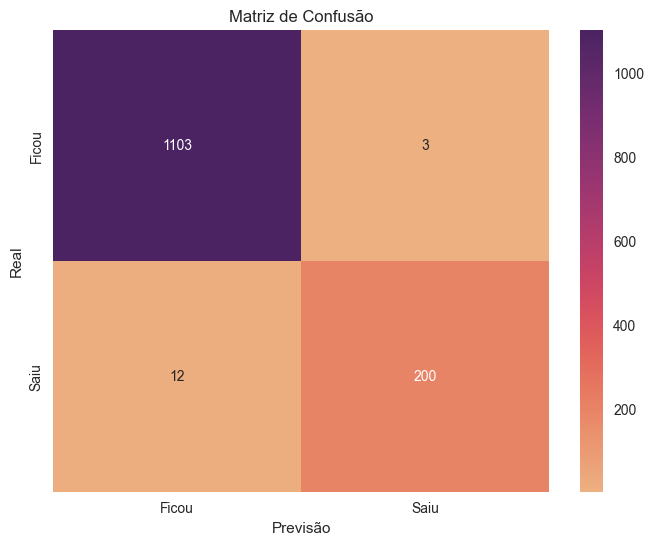


AUC Score Final (Random Forest): 0.9925


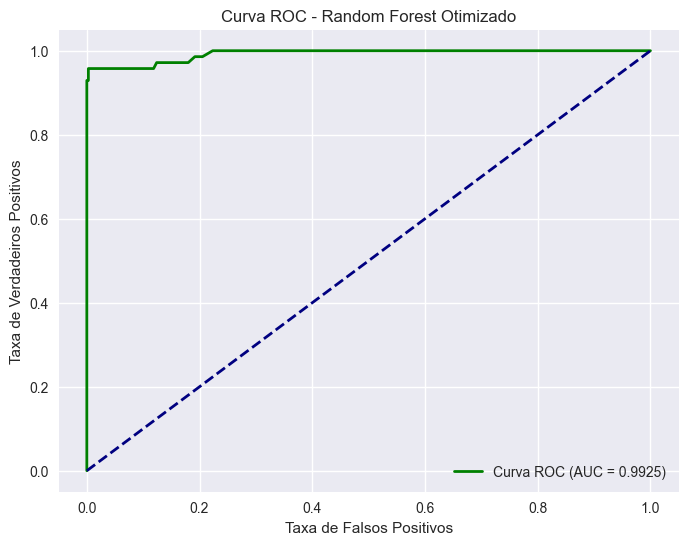

In [683]:
# Treinando o modelo final otimizado com os melhores hiperpar√¢metros
final_rf_model.fit(X_train, y_train)

# Fazendo previs√µes no conjunto de teste com o modelo final otimizado
y_pred_rf_final = final_rf_model.predict(X_test)
y_proba_rf_final = final_rf_model.predict_proba(X_test)[:, 1]

# Avaliando o modelo final otimizado
print("\nRelat√≥rio de Classifica√ß√£o (Random Forest Otimizado):")
print(classification_report(y_test, y_pred_rf_final, target_names=['Ficou (0)', 'Saiu (1)']))

# Avaliando o modelo
# M√©tricas
acuracia_rf_final = accuracy_score(y_test, y_pred_rf_final)
precisao_rf_final = precision_score(y_test, y_pred_rf_final)
recall_rf_final = recall_score(y_test, y_pred_rf_final)
f1_rf_final = f1_score(y_test, y_pred_rf_final)

# Exibindo os resultados
print("-" * 60)
print(f"Acur√°cia:  {acuracia_rf_final:.4f}")
print(f"Precis√£o:  {precisao_rf_final:.4f}")
print(f"Recall:    {recall_rf_final:.4f}")
print(f"F1-Score:  {f1_rf_final:.4f}")
print("-" * 60)

# Matriz de Confus√£o Final
cm_rf_final = confusion_matrix(y_test, y_pred_rf_final)

# Atribui os valores
vn, fp, fn, vp = cm_rf_final.ravel()

# Exibe os resultados
print(f"Verdadeiros Negativos (VN): {vn}")
print(f"Falsos Positivos (FP):      {fp}")
print(f"Falsos Negativos (FN):      {fn}")
print(f"Verdadeiros Positivos (VP): {vp}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_final, annot=True, fmt='d', cmap='flare', xticklabels=['Ficou', 'Saiu'], yticklabels=['Ficou', 'Saiu'])
plt.title('Matriz de Confus√£o')
plt.xlabel('Previs√£o')
plt.ylabel('Real')
plt.show()

# Calcula o AUC Score final para o modelo Random Forest otimizado
auc_rf_final = roc_auc_score(y_test, y_proba_rf_final)
print(f"\nAUC Score Final (Random Forest): {auc_rf_final:.4f}")

# Calcula os pontos da curva ROC para o modelo Random Forest otimizado
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Curva ROC (AUC = {auc_rf_final:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest Otimizado')
plt.legend(loc="lower right")
plt.show()

## Import√¢ncia das vari√°veis no Modelo Otimizado

Top 10 Features mais importantes segundo o Random Forest Otimizado:
                    Feature  Importance
0                       Age      0.1101
4             MonthlyIncome      0.1084
8         TotalWorkingYears      0.0929
1          DistanceFromHome      0.0762
10           YearsAtCompany      0.0727
6         PercentSalaryHike      0.0695
5        NumCompaniesWorked      0.0582
12     YearsWithCurrManager      0.0570
9     TrainingTimesLastYear      0.0449
11  YearsSinceLastPromotion      0.0443
--------------------------------------------------


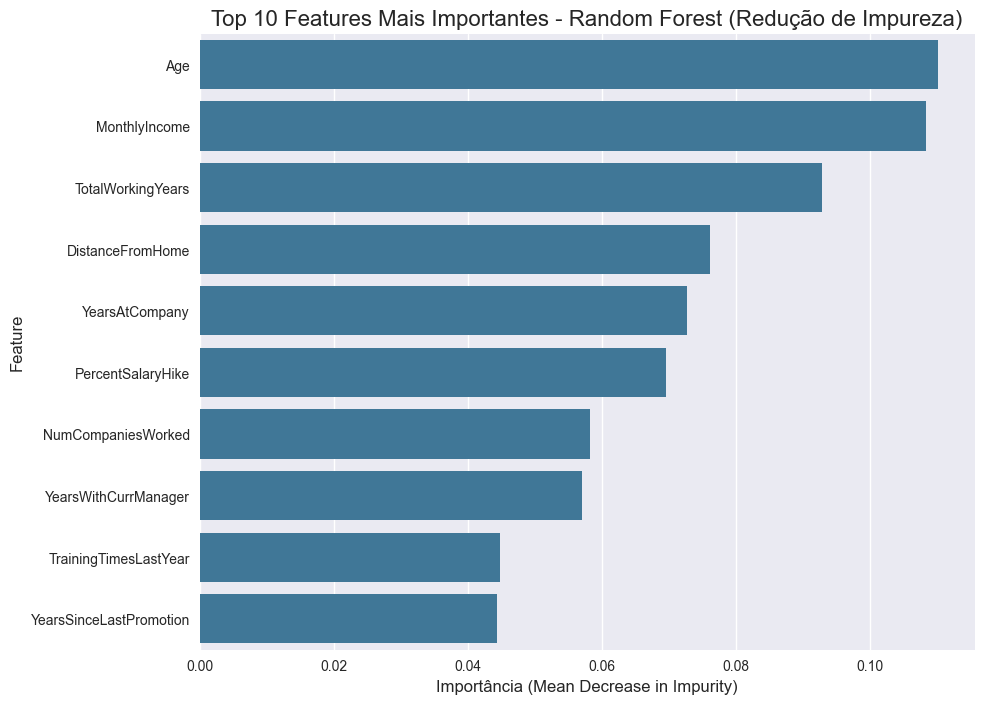

In [684]:
# Import√¢ncia das vari√°veis do modelo Random Forest otimizado
importances_rf = final_rf_model.feature_importances_

# Criando um DataFrame para armazenar as import√¢ncias das vari√°veis
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Exibindo as 10 principais vari√°veis mais importantes
print("Top 10 Features mais importantes segundo o Random Forest Otimizado:")
print(feature_importance_df.head(10))
print("-" * 50)


# Gr√°fico de barras das 10 principais vari√°veis mais importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), color='#327BA5')
plt.title('Top 10 Features Mais Importantes - Random Forest (Redu√ß√£o de Impureza)', fontsize=16)
plt.xlabel('Import√¢ncia (Mean Decrease in Impurity)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# Benchmark dos Modelos ü§ñ‚öîÔ∏èü§ñ

## Coleta e Organiza√ß√£o dos Dados do Benchmark

In [685]:
# Benchmark Final: XGBoost vs. Random Forest

# --- Coletando os resultados finais de ambos os modelos ---

# M√©tricas do XGBoost Otimizado
y_pred_xgb_final = final_xgb_model.predict(X_test)
y_proba_xgb_final = final_xgb_model.predict_proba(X_test)[:, 1]

f1_xgb = f1_score(y_test, y_pred_xgb_final)
recall_xgb = recall_score(y_test, y_pred_xgb_final)
precision_xgb = precision_score(y_test, y_pred_xgb_final)
auc_xgb = roc_auc_score(y_test, y_proba_xgb_final)

# M√©tricas do Random Forest Otimizado 
y_pred_rf_final = final_rf_model.predict(X_test)
y_proba_rf_final = final_rf_model.predict_proba(X_test)[:, 1]

f1_rf = f1_score(y_test, y_pred_rf_final)
recall_rf = recall_score(y_test, y_pred_rf_final)
precision_rf = precision_score(y_test, y_pred_rf_final)
auc_rf = roc_auc_score(y_test, y_proba_rf_final)

# --- Criando o DataFrame de Compara√ß√£o ---
data = {
    'M√©trica': ['F1-Score', 'Recall', 'Precis√£o', 'AUC Score'],
    'XGBoost': [f1_xgb, recall_xgb, precision_xgb, auc_xgb],
    'Random Forest Otimizado': [f1_rf, recall_rf, precision_rf, auc_rf]
}

# Criando o DataFrame e definindo a coluna 'M√©trica' como √≠ndice
df_benchmark = pd.DataFrame(data).set_index('M√©trica')

# Formatando para 4 casas decimais para uma melhor visualiza√ß√£o
pd.options.display.float_format = '{:.4f}'.format

display(df_benchmark)

XGBoost  Random Forest Otimizado
M√©trica                                    
F1-Score    0.9644                   0.9639
Recall      0.9575                   0.9434
Precis√£o    0.9713                   0.9852
AUC Score   0.9747                   0.9925

## Compara√ß√£o Visual da Curva ROC

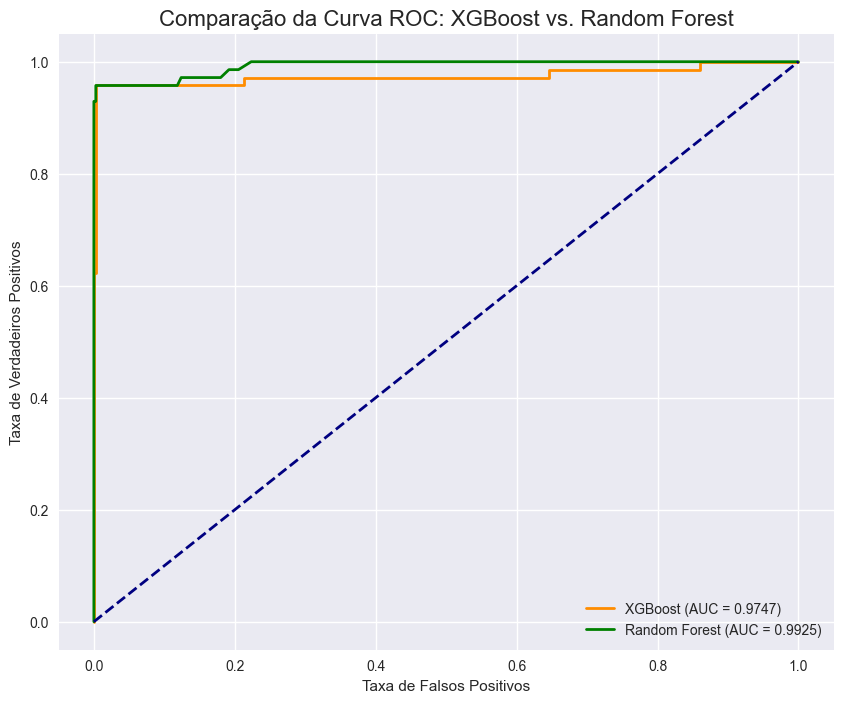

In [686]:
# Plotando a curva ROC para comparar os dois modelos
plt.figure(figsize=(10, 8))

# Curva ROC do XGBoost
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {auc_xgb:.4f})')

# Curva ROC do Random Forest
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_rf_final:.4f})')

# Linha de refer√™ncia
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Compara√ß√£o da Curva ROC: XGBoost vs. Random Forest', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# An√°lise de Vi√©s

In [687]:
# Criar faixas et√°rias
X_test['faixa_etaria'] = pd.cut(X_test['Age'], bins=[18, 30, 45, 60, 100],
                                 labels=['18-30', '31-45', '46-60', '61+'])

# Adicionar as previs√µes e verdadeiros ao DataFrame
df_avaliacao = X_test.copy()
df_avaliacao['y_real'] = y_test.values
df_avaliacao['y_pred'] = y_pred_rf_final

# Avaliar desempenho por grupo et√°rio
print("="*50)
print("AN√ÅLISE DE PERFORMANCE POR FAIXA ET√ÅRIA")
print("="*50)

grupos = df_avaliacao.groupby('faixa_etaria', observed=True)

# Resumo geral primeiro
print(f"\nDistribui√ß√£o por faixa et√°ria:")
print(df_avaliacao['faixa_etaria'].value_counts().sort_index())
print(f"\nTaxa de churn por faixa:")
taxa_churn = df_avaliacao.groupby('faixa_etaria')['y_real'].mean()
print(taxa_churn.sort_index())

print("\n" + "="*50)
print("M√âTRICAS DETALHADAS POR FAIXA")
print("="*50)

for faixa, grupo in grupos:
    print(f"\nFAIXA ET√ÅRIA: {faixa}")
    print(f"   Tamanho da amostra: {len(grupo)}")
    print(f"   Taxa real de churn: {grupo['y_real'].mean():.2%}")
    
    # Verifica se h√° pelo menos duas classes
    if grupo['y_real'].nunique() < 2:
        print("Grupo com apenas uma classe. M√©tricas n√£o aplic√°veis.")
        continue
    
    print(classification_report(grupo['y_real'], grupo['y_pred'], zero_division=0))
    print("-"*50)

AN√ÅLISE DE PERFORMANCE POR FAIXA ET√ÅRIA

Distribui√ß√£o por faixa et√°ria:
faixa_etaria
18-30    335
31-45    748
46-60    227
61+        0
Name: count, dtype: int64

Taxa de churn por faixa:
faixa_etaria
18-30   0.2597
31-45   0.1270
46-60   0.1189
61+        NaN
Name: y_real, dtype: float64

M√âTRICAS DETALHADAS POR FAIXA

FAIXA ET√ÅRIA: 18-30
   Tamanho da amostra: 335
   Taxa real de churn: 25.97%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       248
           1       1.00      0.97      0.98        87

    accuracy                           0.99       335
   macro avg       0.99      0.98      0.99       335
weighted avg       0.99      0.99      0.99       335

--------------------------------------------------

FAIXA ET√ÅRIA: 31-45
   Tamanho da amostra: 748
   Taxa real de churn: 12.70%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       653
           1       1.00    

C:\Users\Book\AppData\Local\Temp\ipykernel_4608\4016935453.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_churn = df_avaliacao.groupby('faixa_etaria')['y_real'].mean()


In [688]:
# Criar faixas de renda
bins_renda = [0, 30000, 50000, 80000, 120000, float('inf')]
labels_renda = ['At√© 30k', '30k-50k', '50k-80k', '80k-120k', '120k+']

# Adicionar a coluna de faixa de renda ao DataFrame de avalia√ß√£o
df_avaliacao['faixa_renda'] = pd.cut(df_avaliacao['MonthlyIncome'], 
                                     bins=bins_renda, 
                                     labels=labels_renda, 
                                     right=False)

# Exibir an√°lise de performance por faixa de renda
print("\n" + "="*50)
print("AN√ÅLISE DE PERFORMANCE POR FAIXA DE RENDA")
print("="*50)

# Agrupar pela nova coluna 'faixa_renda'
grupos_renda = df_avaliacao.groupby('faixa_renda', observed=True)

# Resumo geral primeiro
print(f"\nDistribui√ß√£o por faixa de renda:")
print(df_avaliacao['faixa_renda'].value_counts().sort_index())
print(f"\nTaxa de churn por faixa de renda:")
taxa_churn_renda = df_avaliacao.groupby('faixa_renda', observed=True)['y_real'].mean()
print(taxa_churn_renda.sort_index())

print("\n" + "="*50)
print("M√âTRICAS DETALHADAS POR FAIXA DE RENDA")
print("="*50)

# Iterar sobre cada grupo de renda e calcular as m√©tricas
for faixa, grupo in grupos_renda:
    print(f"\nFAIXA DE RENDA: {faixa}")
    print(f"   Tamanho da amostra: {len(grupo)}")
    
    if len(grupo) > 0:
        print(f"Taxa real de churn: {grupo['y_real'].mean():.2%}")
    
    # Verifica se h√° pelo menos duas classes
    if grupo['y_real'].nunique() < 2:
        print("\n   Grupo com apenas uma classe. M√©tricas de classifica√ß√£o n√£o aplic√°veis.")
    else:
        # Usa a mesma coluna 'y_pred' que j√° tem as previs√µes do RF
        print(classification_report(grupo['y_real'], grupo['y_pred'], zero_division=0, target_names=['Ficou', 'Saiu']))
    
    print("-"*50)


AN√ÅLISE DE PERFORMANCE POR FAIXA DE RENDA

Distribui√ß√£o por faixa de renda:
faixa_renda
At√© 30k     338
30k-50k     312
50k-80k     313
80k-120k    174
120k+       181
Name: count, dtype: int64

Taxa de churn por faixa de renda:
faixa_renda
At√© 30k    0.2071
30k-50k    0.1635
50k-80k    0.1629
80k-120k   0.1322
120k+      0.0939
Name: y_real, dtype: float64

M√âTRICAS DETALHADAS POR FAIXA DE RENDA

FAIXA DE RENDA: At√© 30k
   Tamanho da amostra: 338
Taxa real de churn: 20.71%
              precision    recall  f1-score   support

       Ficou       0.99      1.00      0.99       268
        Saiu       1.00      0.96      0.98        70

    accuracy                           0.99       338
   macro avg       0.99      0.98      0.99       338
weighted avg       0.99      0.99      0.99       338

--------------------------------------------------

FAIXA DE RENDA: 30k-50k
   Tamanho da amostra: 312
Taxa real de churn: 16.35%
              precision    recall  f1-score   support

 

# Insights de Neg√≥cio e Recomenda√ß√µes

#### √â poss√≠vel prever a rotatividade antes que ela aconte√ßa?

Sim. O modelo final baseado em **Random Forest** apresentou **alta capacidade de identificar os funcion√°rios que est√£o prestes a sair**, com **recall de 94,3%** e **precis√£o de 98,5%**. Isso significa que o modelo consegue prever a maioria dos casos reais de churn com **baixo √≠ndice de falsos alarmes**, tornando sua aplica√ß√£o pr√°tica altamente confi√°vel para a√ß√µes de reten√ß√£o direcionadas. 

#### Quais funcion√°rios est√£o em maior risco de deixar a empresa?

A an√°lise indicou um perfil de risco concentrado em tr√™s caracter√≠sticas principais:

- **Viajantes Frequentes**: Funcion√°rios que se deslocam com frequ√™ncia apresentaram maior taxa de sa√≠da. O desgaste da rotina parece ser um fator importante.
- **Representantes de Vendas**: Esta fun√ß√£o mostrou-se mais sens√≠vel ao churn, possivelmente pela press√£o por metas ou pela natureza competitiva da √°rea.
- **Funcion√°rios com Menor Renda**: A maior taxa de churn (21%) foi observada na faixa salarial de at√© 30 mil anuais. Esses profissionais, em sua maioria em in√≠cio de carreira, podem ter menor v√≠nculo com a empresa e maior propens√£o a buscar novas oportunidades.

#### Quais fatores influenciam a sa√≠da de um funcion√°rio?

A an√°lise de import√¢ncia das vari√°veis mostrou que os principais fatores associados ao churn s√£o:

- **Idade e Renda Mensal**: Funcion√°rios mais jovens e com menor renda t√™m maior probabilidade de sa√≠da.
- **Total de Anos de Carreira**: Influencia mais do que o tempo na empresa atual, refletindo o momento da carreira do profissional.
- **Tempo com o Gestor Atual**: Um relacionamento consistente com a lideran√ßa est√° associado a maior perman√™ncia.


### Resumo

O desafio da reten√ß√£o na HR Insights, segundo os dados analisados, est√° relacionado a tr√™s frentes principais:

1. **Sobrecarga operacional** (viagens frequentes)
2. **Press√£o de fun√ß√£o** (representantes de vendas)
3. **Desengajamento dos talentos na base da pir√¢mide** (baixa renda)

As estrat√©gias mais eficazes de reten√ß√£o ser√£o aquelas que atuarem sobre esses tr√™s pilares de forma combinada.


### Recomenda√ß√µes Estrat√©gicas

- **Planos de carreira e programas de reconhecimento** para cargos de entrada (at√© 30k).
- **Iniciativas de al√≠vio de carga** para fun√ß√µes com viagens intensas (ex: home office p√≥s-viagem, pausas programadas).
- **Capacita√ß√£o de gestores** com altas taxas de churn em suas equipes, promovendo v√≠nculos mais duradouros.
